# Data Analysis - Area 3 (kumpula + vikki) - 12.09.2016 - 25.09.2018

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from weather import get_daily_weather_data_2016_to_2018


In [45]:
weather =  get_daily_weather_data_2016_to_2018()
weather.drop(columns=["month"])

date  precipitation_intensity  cloud_amount  air_temperature
0    2016-01-01                    0.000          7.50           -4.750
1    2016-01-02                    0.000          7.00           -7.125
2    2016-01-03                    0.450          8.50           -8.725
3    2016-01-04                    0.000          3.25          -13.125
4    2016-01-05                    0.000          7.25          -18.775
5    2016-01-06                    0.000          7.00          -20.725
6    2016-01-07                    0.000          0.75          -23.250
7    2016-01-08                    0.000          5.25          -19.125
8    2016-01-09                    0.075          7.50          -10.200
9    2016-01-10                    0.000          8.50          -12.300
10   2016-01-11                    0.000          7.50           -7.125
11   2016-01-12                    0.725          9.00           -8.200
12   2016-01-13                    0.000          7.00          -10.675
13   2016-01-14                    0.000          4.00          -12.075
14   2016-01-15                    0.000          3.75           -8.125
15   2016-01-16                    0.000          2.75          -13.175
16   2016-01-17                    0.000          3.50           -8.125
17   2016-01-18                    0.200          7.50          -13.625
18   2016-01-19                    0.000          8.00          -11.525
19   2016-01-20                    0.000          0.50          -17.200
20   2016-01-21                    0.000          4.00          -14.675
21   2016-01-22                    0.000          0.00          -19.700
22   2016-01-23                    0.000          7.00           -2.875
23   2016-01-24                    1.475          7.50           -2.650
24   2016-01-25                    0.000          7.75           -1.300
25   2016-01-26                    1.650          7.75            1.000
26   2016-01-27                    0.675          7.75            1.650
27   2016-01-28                    0.100          7.00            3.150
28   2016-01-29                    0.000          7.50            0.675
29   2016-01-30                    0.000          5.50            3.575
...         ...                      ...           ...              ...
983  2018-09-10                    0.000          7.00           18.550
984  2018-09-11                    0.025          6.00           17.200
985  2018-09-12                    0.000          6.00           16.500
986  2018-09-13                    0.000          4.00           16.275
987  2018-09-14                    0.000          7.00           16.025
988  2018-09-15                    0.000          5.00           15.525
989  2018-09-16                    0.625          2.00           15.150
990  2018-09-17                    0.675          7.00           13.250
991  2018-09-18                    0.000          6.50           14.725
992  2018-09-19                    0.000          0.00           17.900
993  2018-09-20                    0.000          5.00           17.100
994  2018-09-21                    0.000          6.75           15.725
995  2018-09-22                    0.000          4.50           13.725
996  2018-09-23                    0.000          4.00           13.375
997  2018-09-24                    0.000          4.25           10.700
998  2018-09-25                    0.000          0.00            9.150
999  2018-09-26                    0.325          7.50           10.525
1000 2018-09-27                    0.000          1.00           10.975
1001 2018-09-28                    0.000          1.25            9.400
1002 2018-09-29                    0.000          2.50            8.125
1003 2018-09-30                    0.000          6.25           11.325
1004 2018-10-01                    0.000          0.75           12.200
1005 2018-10-02                    0.000          5.50            9.975
1006 2018-10-03                    0.425          7

In [46]:
df = pd.read_csv('./data/customer_feedback.csv', sep=',')
df.head()

Area                          study        Date  Year      Month  \
0  Area  How well did we succeed today  12/09/2016  2016  September   
1  Area  How well did we succeed today  13/09/2016  2016  September   
2  Area  How well did we succeed today  14/09/2016  2016  September   
3  Area  How well did we succeed today  15/09/2016  2016  September   
4  Area  How well did we succeed today  16/09/2016  2016  September   

   Week Number  Date.1 Day of Week Hour  Extremely Negative   ...     \
0           37      12      monday    -                   9   ...      
1           37      13     tuesday    -                  14   ...      
2           37      14   wednesday    -                  11   ...      
3           37      15    thursday    -                  22   ...      
4           37      16      friday    -                  12   ...      

   Negative %  Positive  Positive %  Extremely Positive  Extremely Positive %  \
0        6.76       102       36.30                 151                 53.74   
1        8.05       113       34.98                 170                 52.63   
2        3.44       112       35.00                 186                 58.13   
3        8.64       129       35.93                 177                 49.30   
4        5.21       117       32.05                 217                 59.45   

   Total  Index  Net Promoter Score(tm)  Red %  Green %  
0    281     80                      44   9.96    90.04  
1    323     79                      40  12.38    87.62  
2    320     83                      51   6.88    93.13  
3    359     76                      35  14.76    85.24  
4    365     83                      51   8.49    91.51  

[5 rows x 22 columns]

In [48]:
df = df.drop(columns=["Area", "study", "Hour"])
df = df.rename(index=str, columns={"Date.1": "Day", "Date":"date"})

df['Date']=pd.to_datetime(df.Date)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['date']=pd.to_datetime(df.date)


In [55]:
data = pd.merge(df, weather, on="date", how="inner")
data.head()

date  Year      Month  Week Number  Day Day of Week  \
0 2016-12-09  2016  September           37   12      monday   
1 2016-09-13  2016  September           37   13     tuesday   
2 2016-09-14  2016  September           37   14   wednesday   
3 2016-09-15  2016  September           37   15    thursday   
4 2016-09-16  2016  September           37   16      friday   

   Extremely Negative  Extremely Negative %  Negative  Negative %  ...    \
0                   9                  3.20        19        6.76  ...     
1                  14                  4.33        26        8.05  ...     
2                  11                  3.44        11        3.44  ...     
3                  22                  6.13        31        8.64  ...     
4                  12                  3.29        19        5.21  ...     

   Extremely Positive %  Total  Index  Net Promoter Score(tm)  Red %  Green %  \
0                 53.74    281     80                      44   9.96    90.04   
1                 52.63    323     79                      40  12.38    87.62   
2                 58.13    320     83                      51   6.88    93.13   
3                 49.30    359     76                      35  14.76    85.24   
4                 59.45    365     83                      51   8.49    91.51   

   precipitation_intensity  cloud_amount  air_temperature  month  
0                      0.0           7.0            1.800    NaN  
1                      0.0           0.0           17.375    NaN  
2                      0.0           0.0           14.950    NaN  
3                      0.0           7.5           15.700    NaN  
4                      0.0           1.5           14.000    NaN  

[5 rows x 23 columns]

In [98]:
data.head()

date  Year      Month  Week Number  Day Day of Week  \
0 2016-12-09  2016  September           37   12      monday   
1 2016-09-13  2016  September           37   13     tuesday   
2 2016-09-14  2016  September           37   14   wednesday   
3 2016-09-15  2016  September           37   15    thursday   
4 2016-09-16  2016  September           37   16      friday   

   Extremely Negative  Extremely Negative %  Negative  Negative %  ...    \
0                   9                  3.20        19        6.76  ...     
1                  14                  4.33        26        8.05  ...     
2                  11                  3.44        11        3.44  ...     
3                  22                  6.13        31        8.64  ...     
4                  12                  3.29        19        5.21  ...     

   Extremely Positive %  Total  Index  Net Promoter Score(tm)  Red %  Green %  \
0                 53.74    281     80                      44   9.96    90.04   
1                 52.63    323     79                      40  12.38    87.62   
2                 58.13    320     83                      51   6.88    93.13   
3                 49.30    359     76                      35  14.76    85.24   
4                 59.45    365     83                      51   8.49    91.51   

   precipitation_intensity  cloud_amount  air_temperature  month  
0                      0.0           7.0            1.800    NaN  
1                      0.0           0.0           17.375    NaN  
2                      0.0           0.0           14.950    NaN  
3                      0.0           7.5           15.700    NaN  
4                      0.0           1.5           14.000    NaN  

[5 rows x 23 columns]

In [72]:

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   

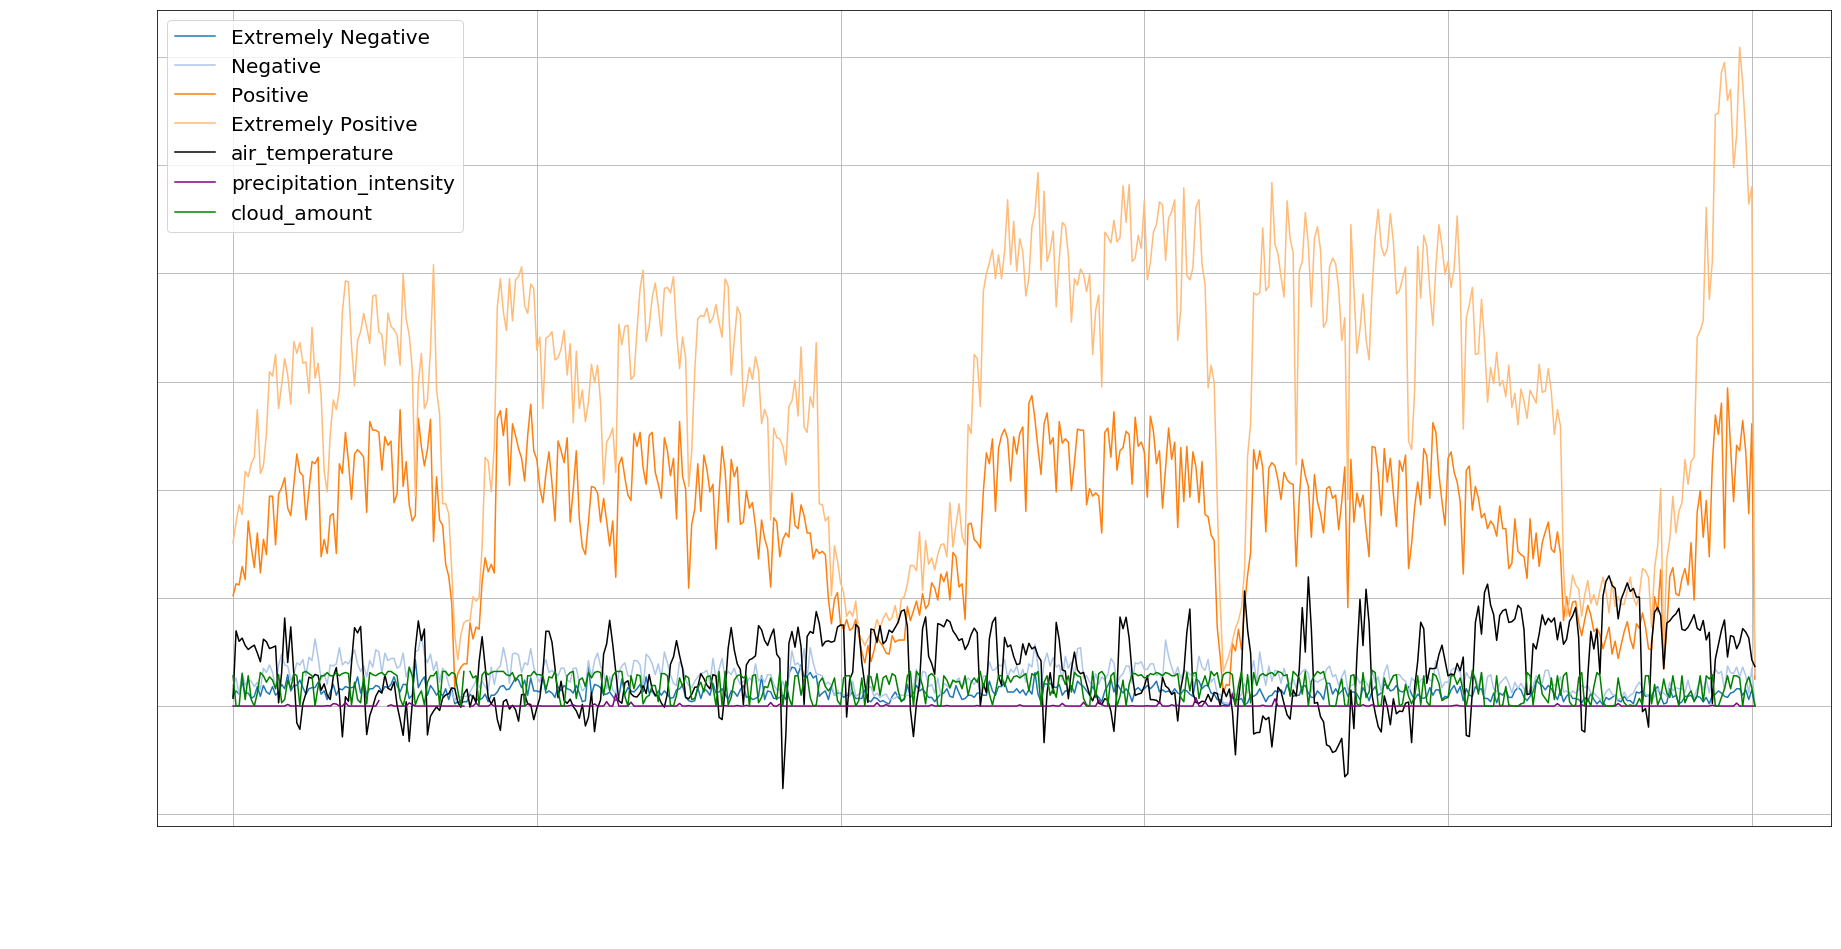

In [190]:
plt.figure(figsize=(30, 15))   
ax = plt.subplot()
x=np.arange(len(data.date))
columns = ['Extremely Negative', 'Negative', 'Positive','Extremely Positive']
for i,y in enumerate(columns):
    plt.plot(x,data[y],color = tableau20[i])
plt.xticks(rotation='vertical',fontsize=40)
plt.yticks(fontsize=40)
start, end = ax.get_xlim()
plt.plot(x,4*data.air_temperature,color = 'black')
plt.plot(x,4*data.precipitation_intensity,color = 'purple')
plt.plot(x,4*data.cloud_amount,color = 'green')
plt.ylabel("No. of People", color='white', fontsize=30)
plt.xlabel("days", color='white', fontsize=30)
#ax.xaxis.set_ticks(np.arange(start, end, 50))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.grid(True)

ax.legend(loc='best',prop={'size':20})
plt.show()

# Correlation Analysis with various parameters
## 1. Scatter Plots

In [106]:
data.columns

Index(['date', 'Year', 'Month', 'Week Number', 'Day', 'Day of Week',
       'Extremely Negative', 'Extremely Negative %', 'Negative', 'Negative %',
       'Positive', 'Positive %', 'Extremely Positive', 'Extremely Positive %',
       'Total', 'Index', 'Net Promoter Score(tm)', 'Red %', 'Green %',
       'precipitation_intensity', 'cloud_amount', 'air_temperature', 'month'],
      dtype='object')

D:\Users\KZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


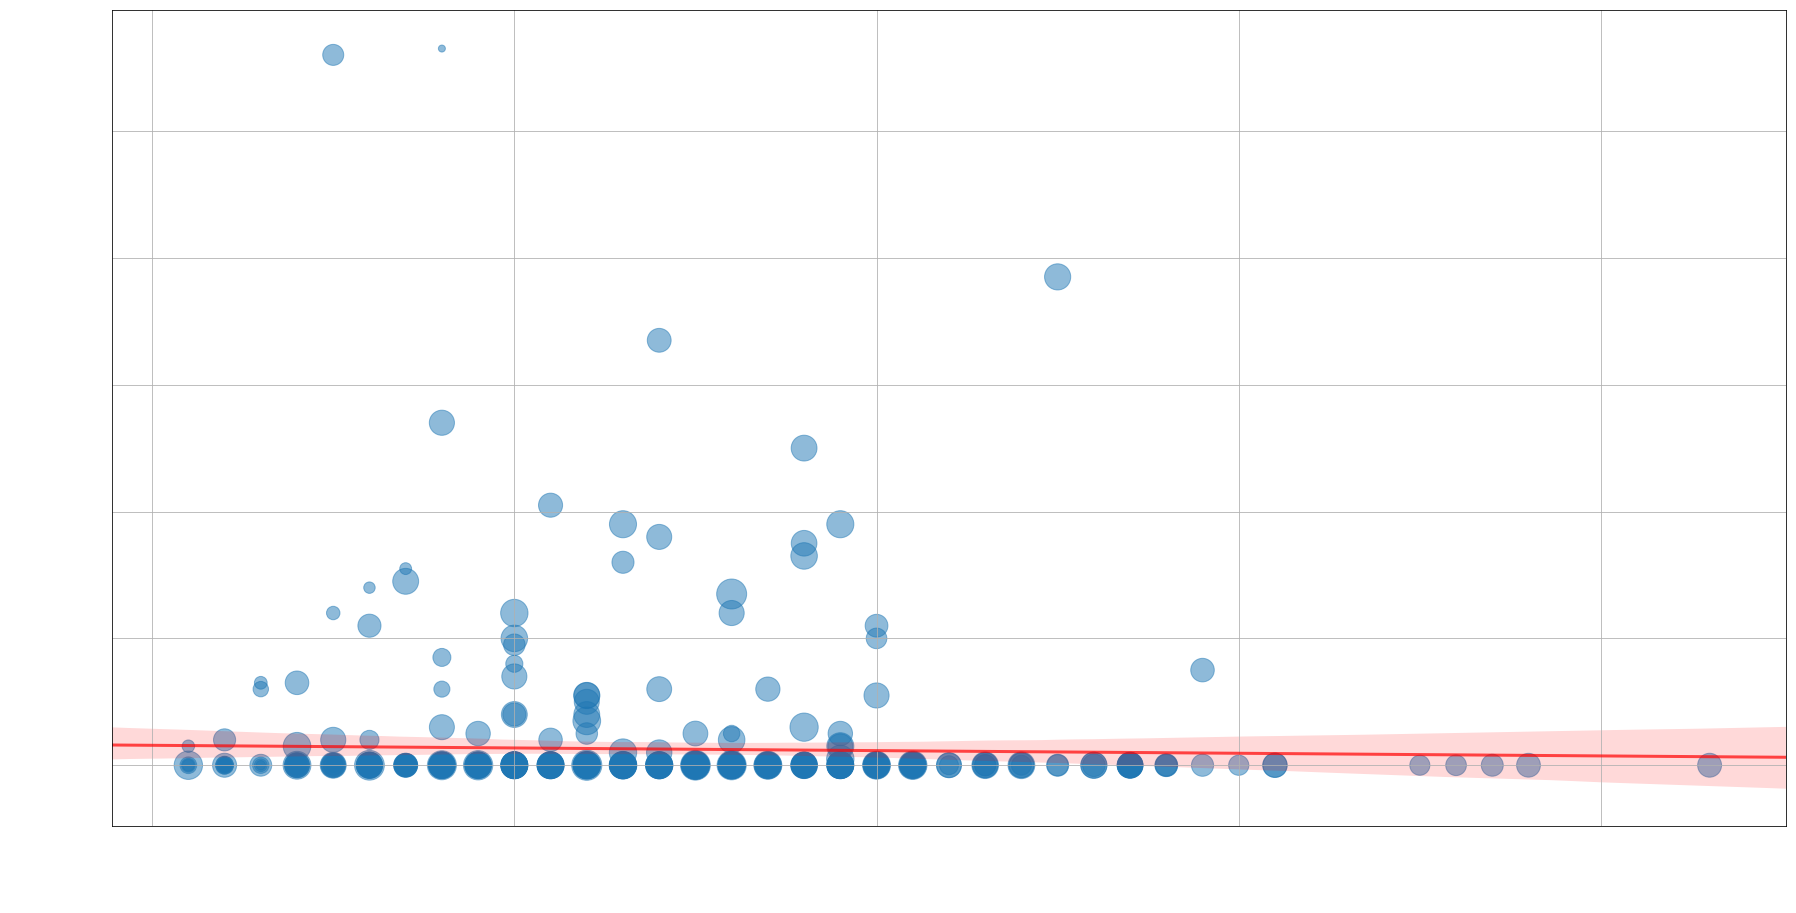

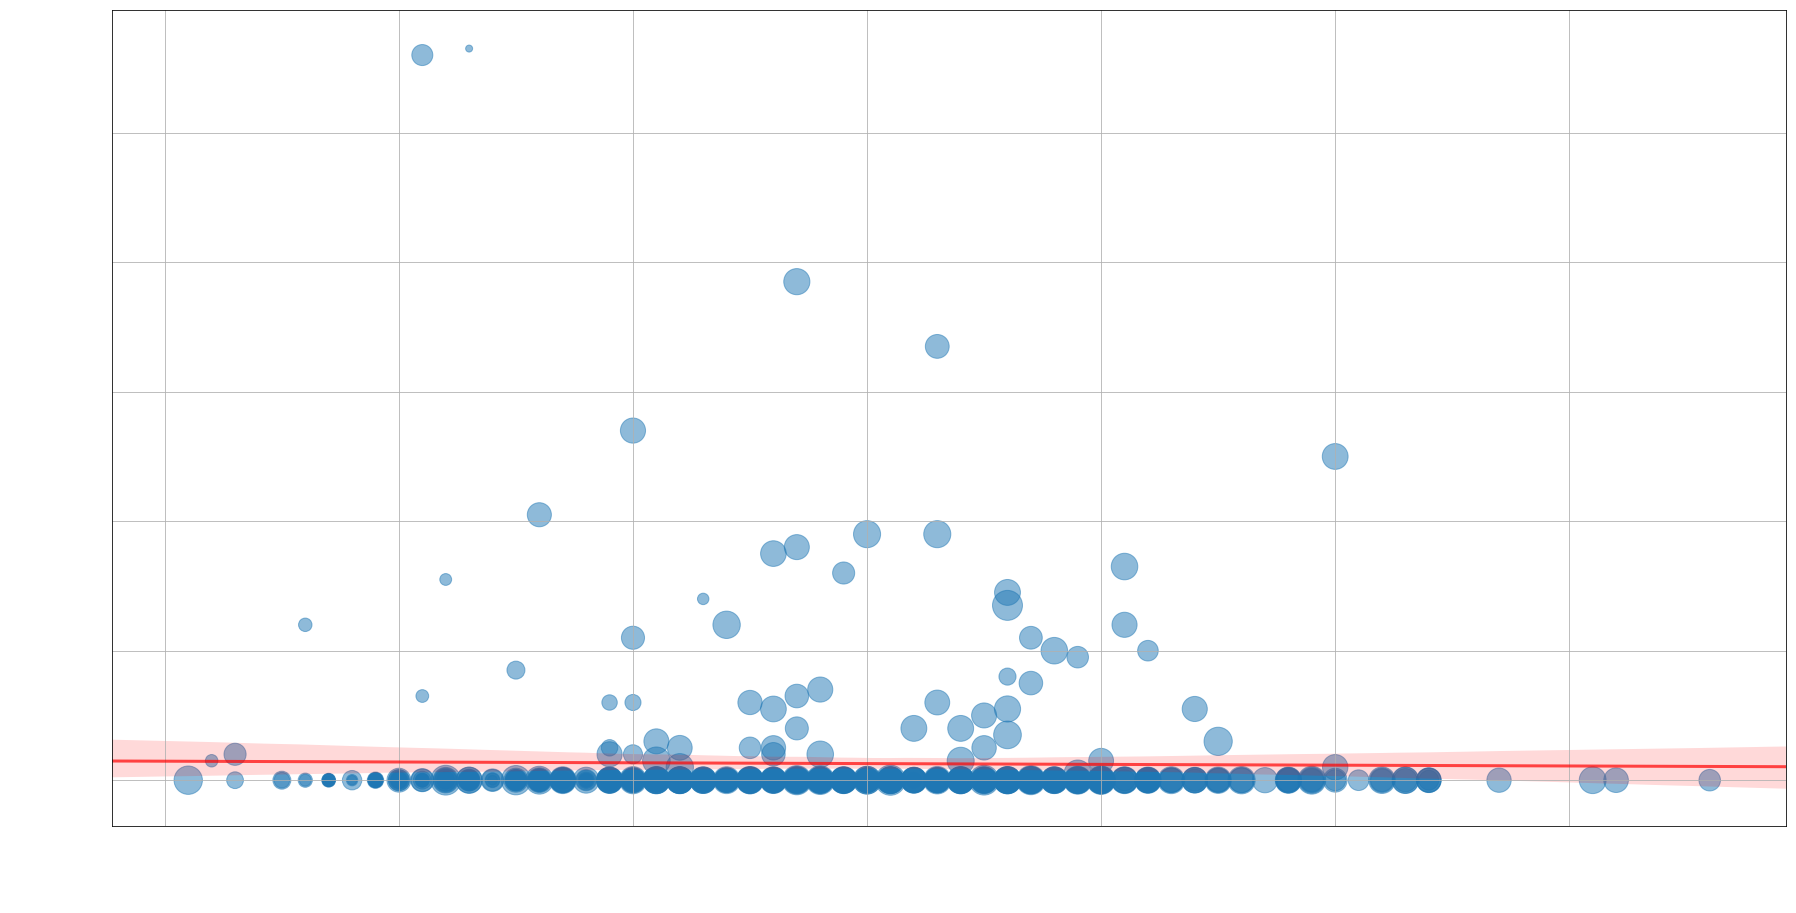

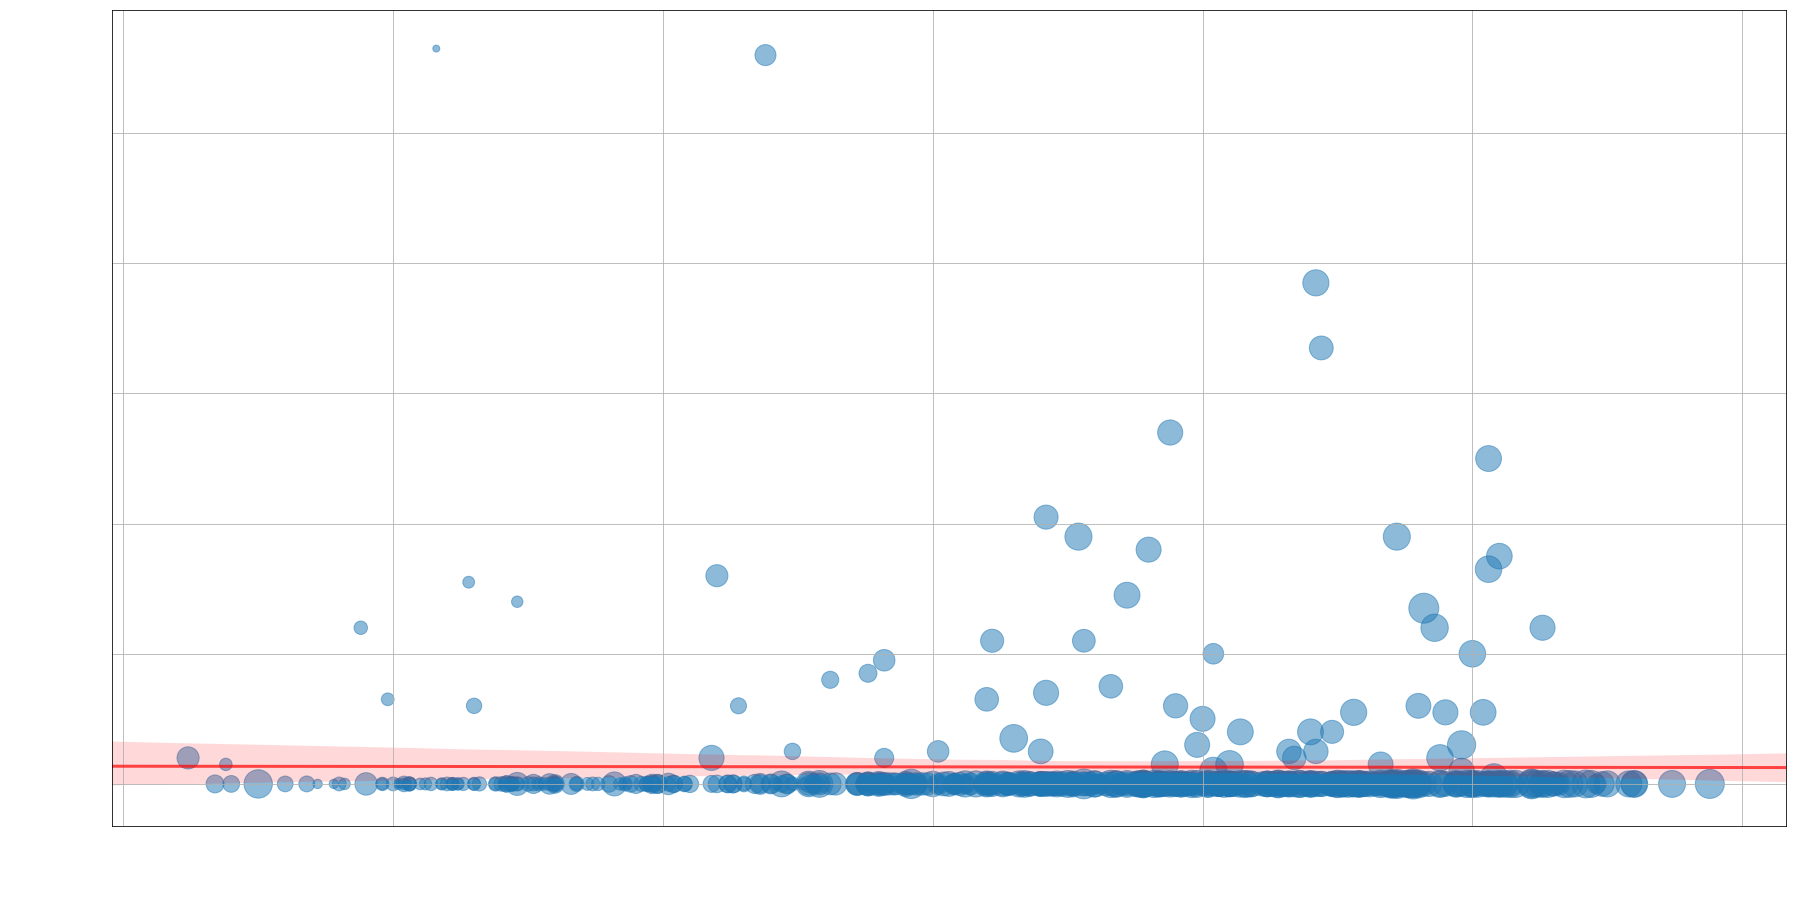

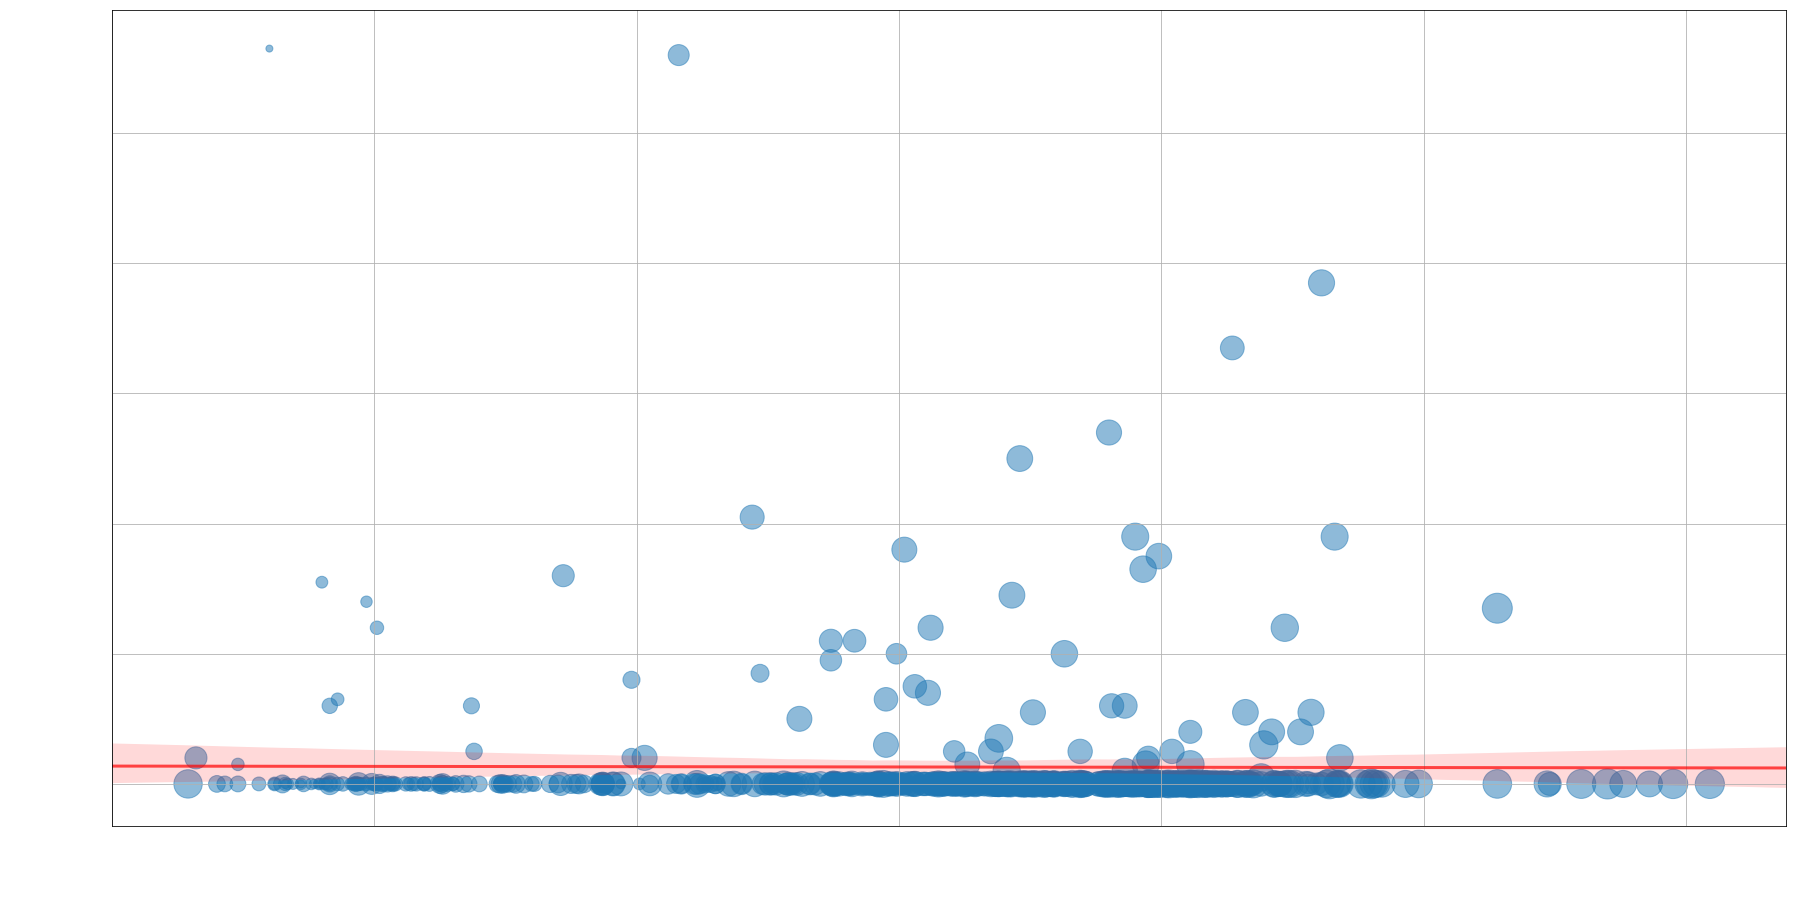

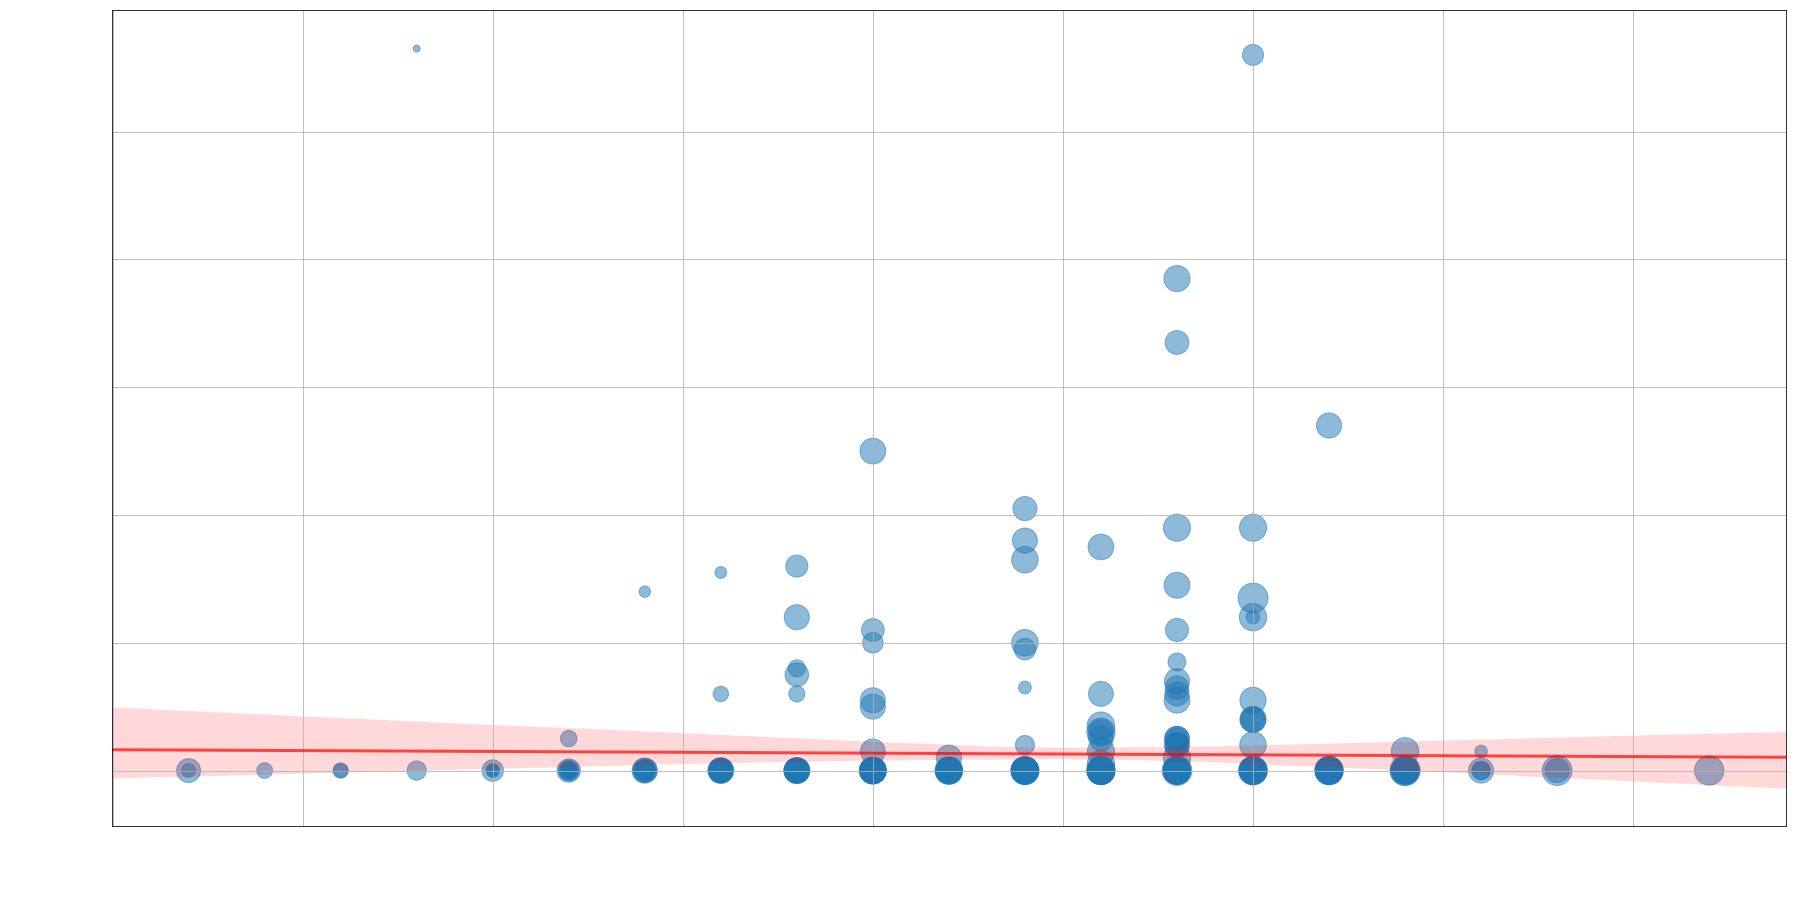

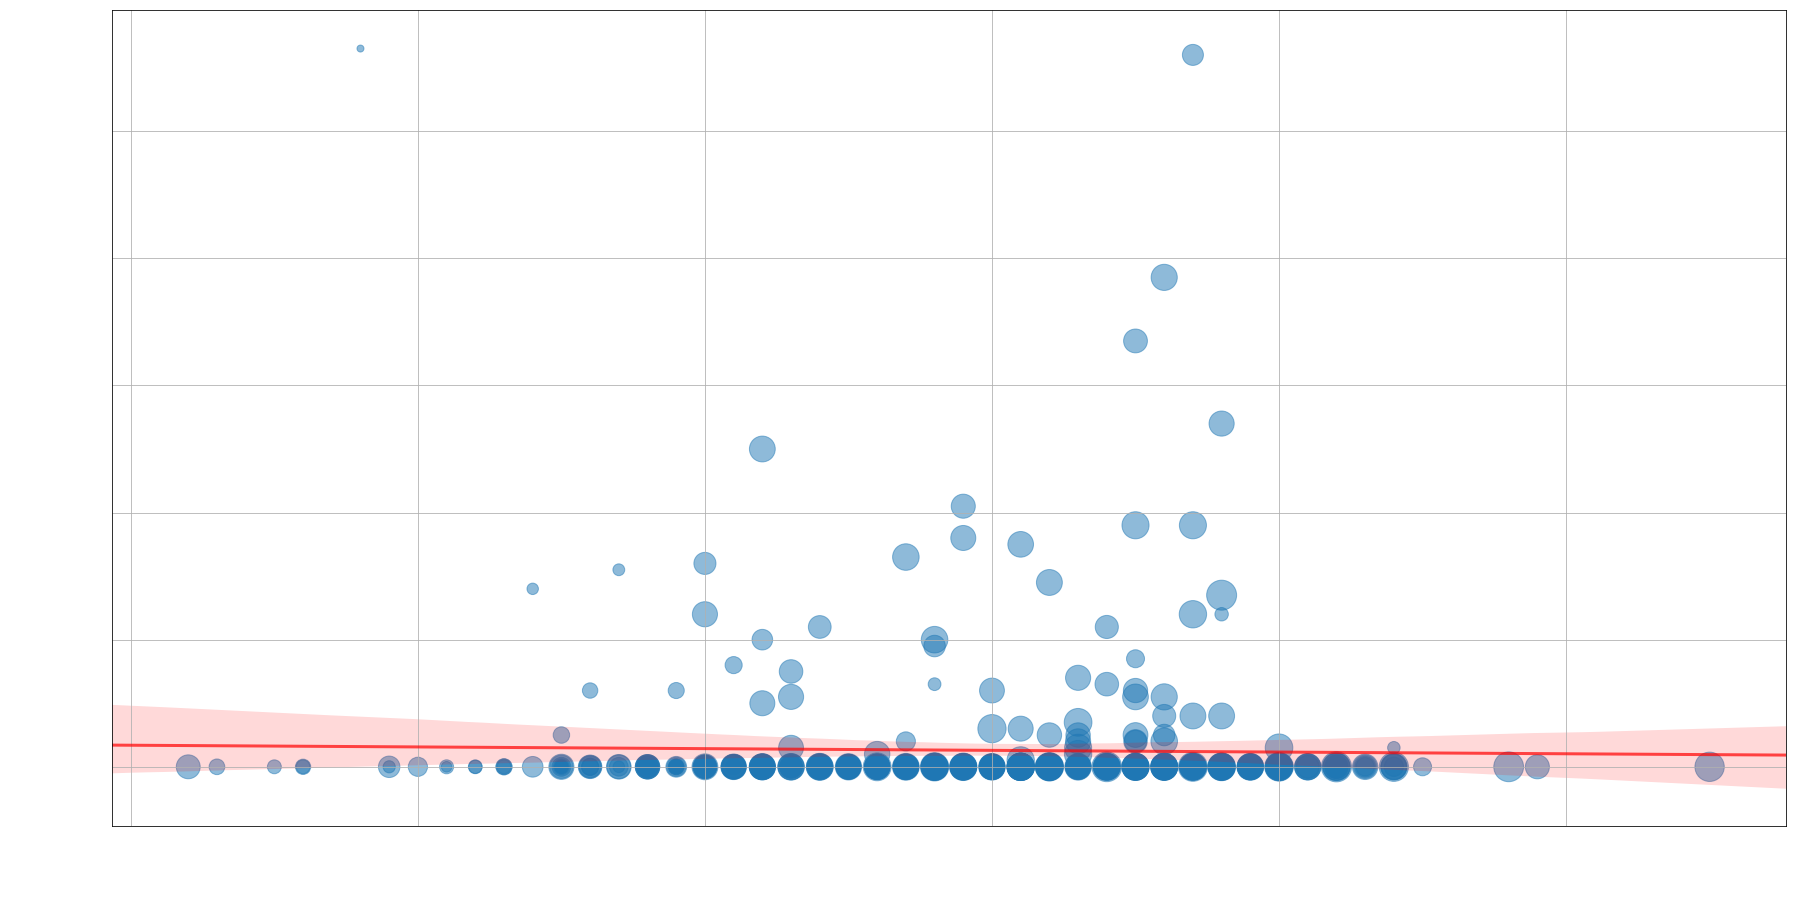

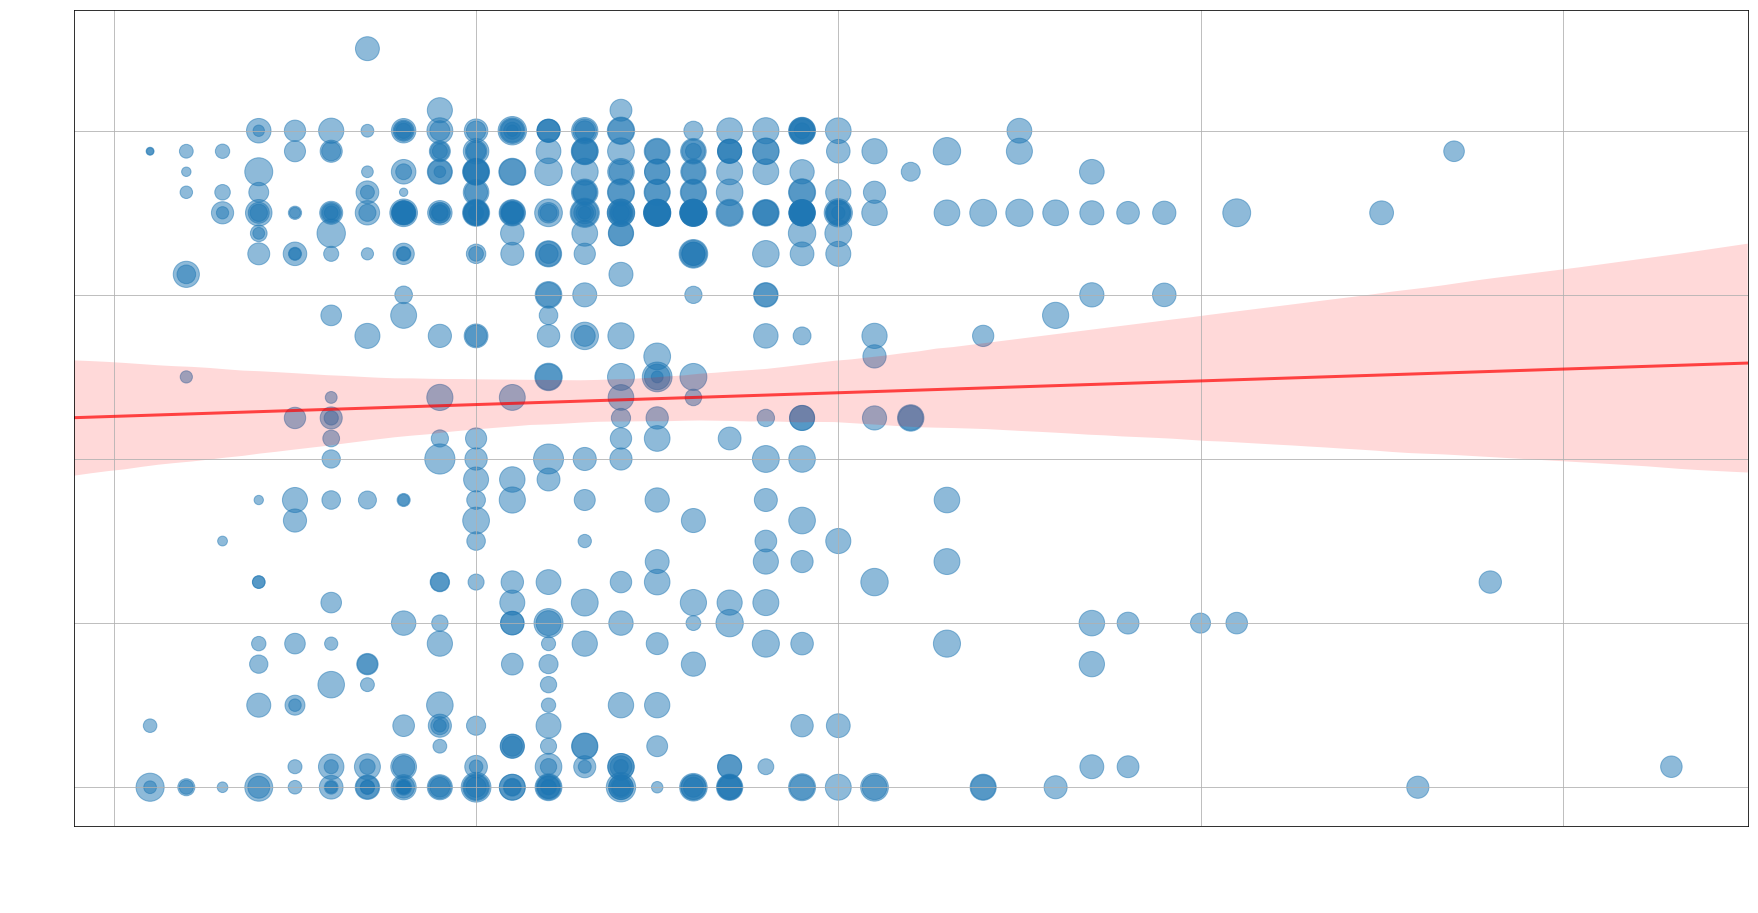

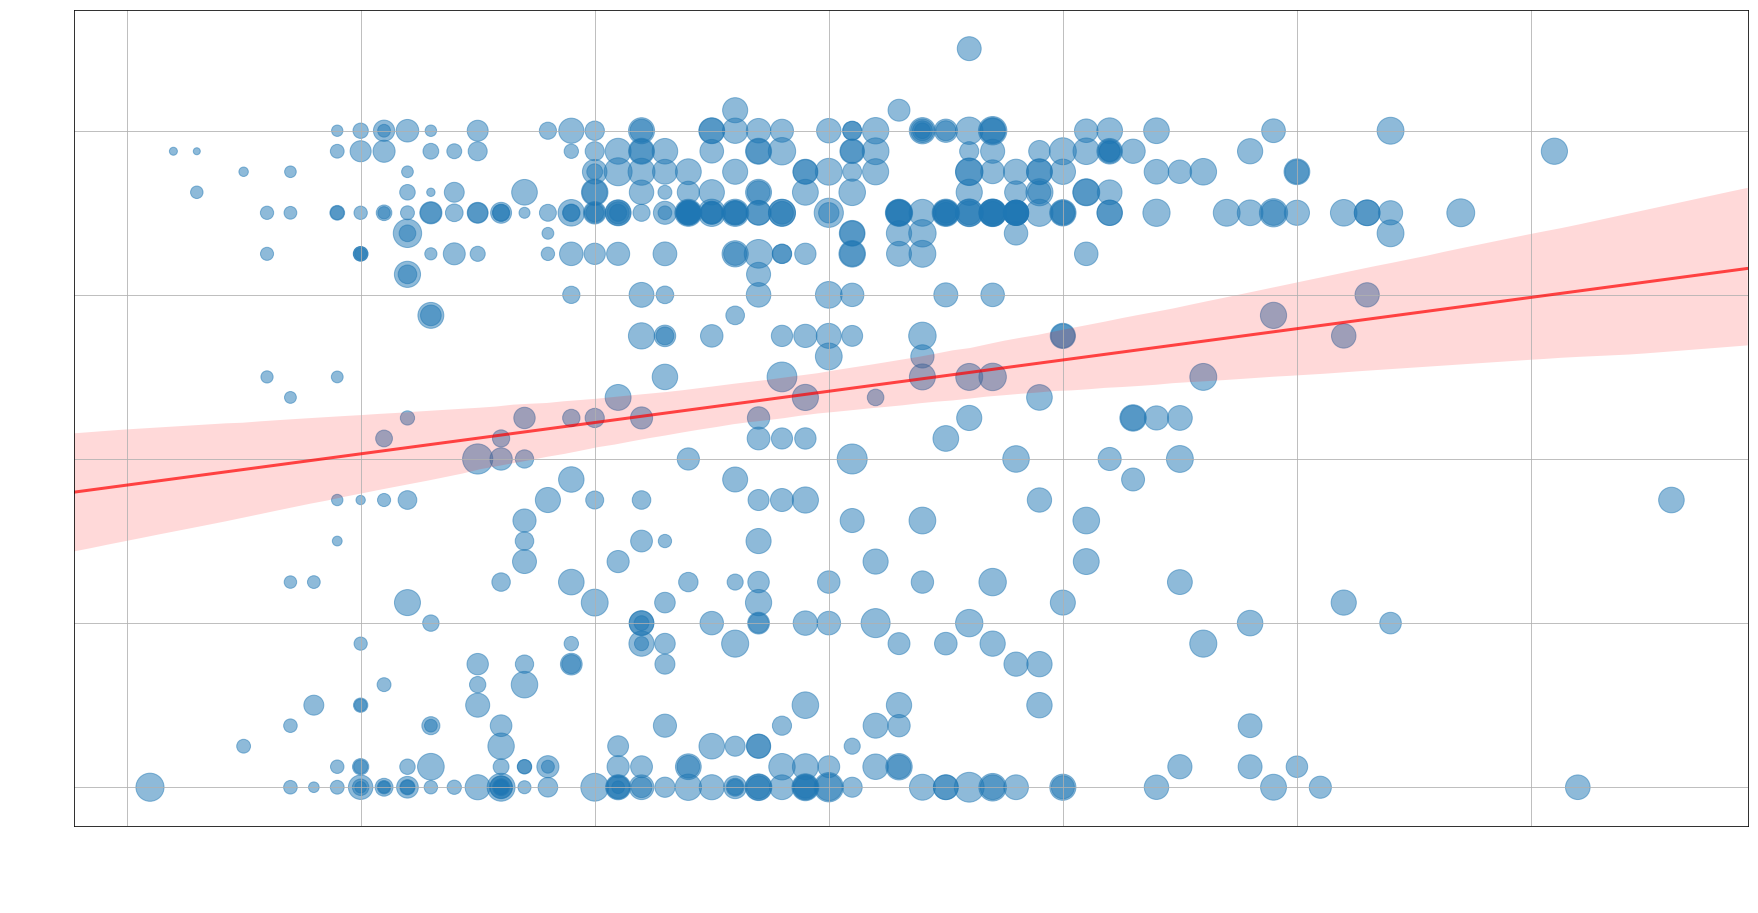

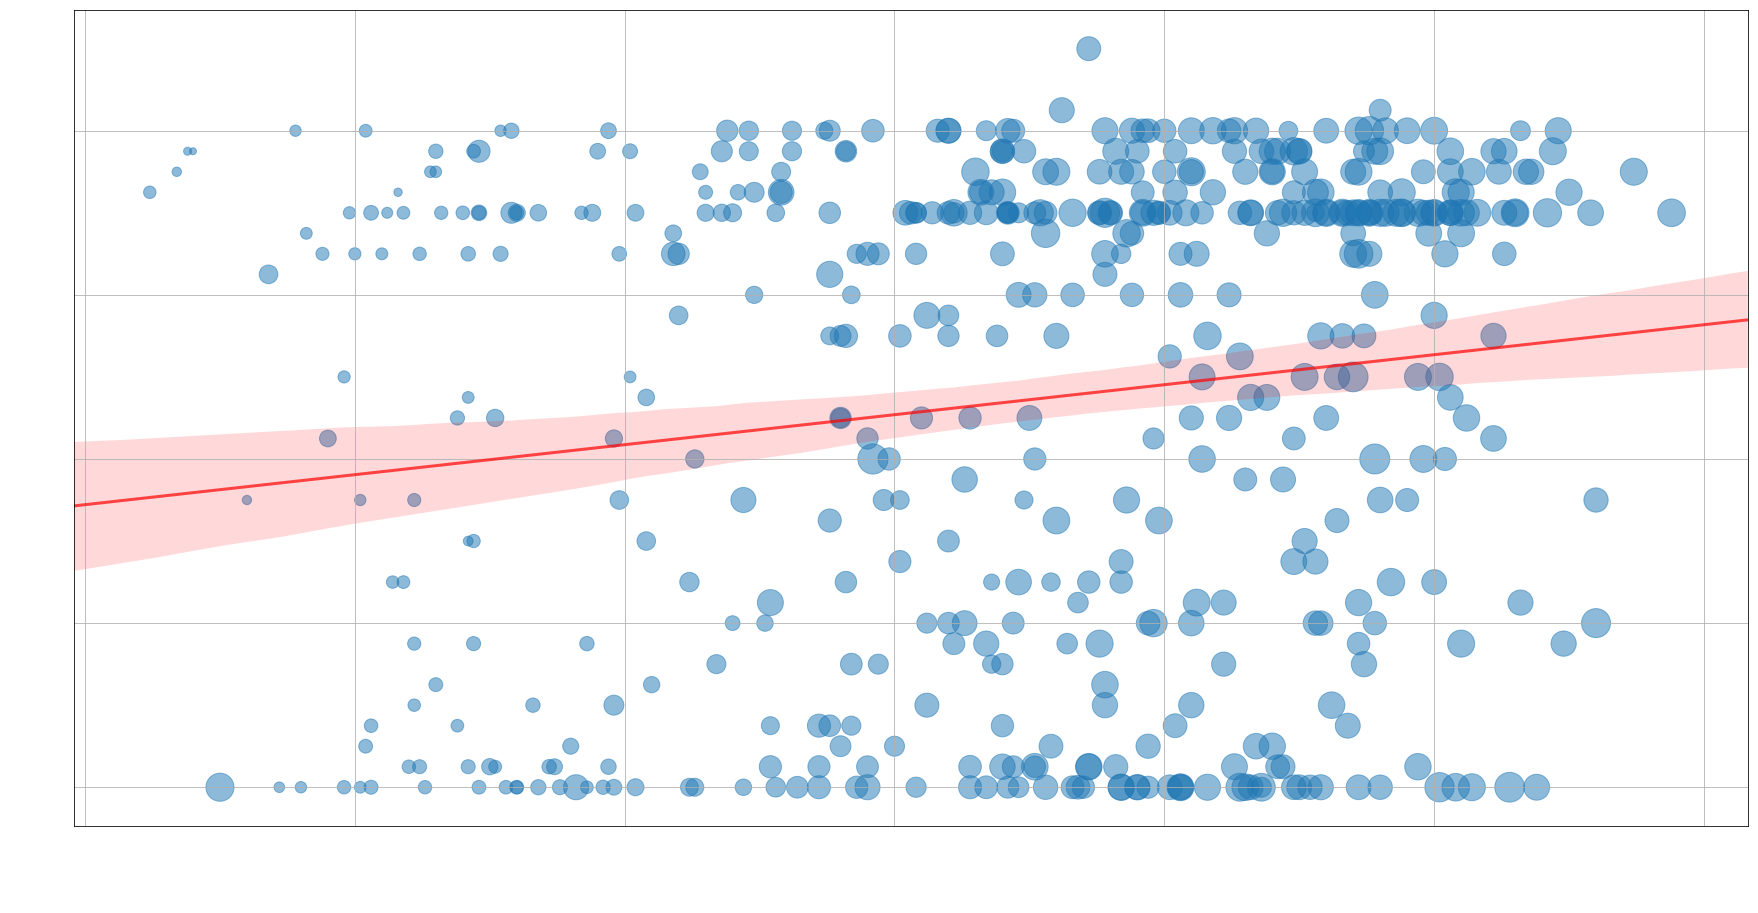

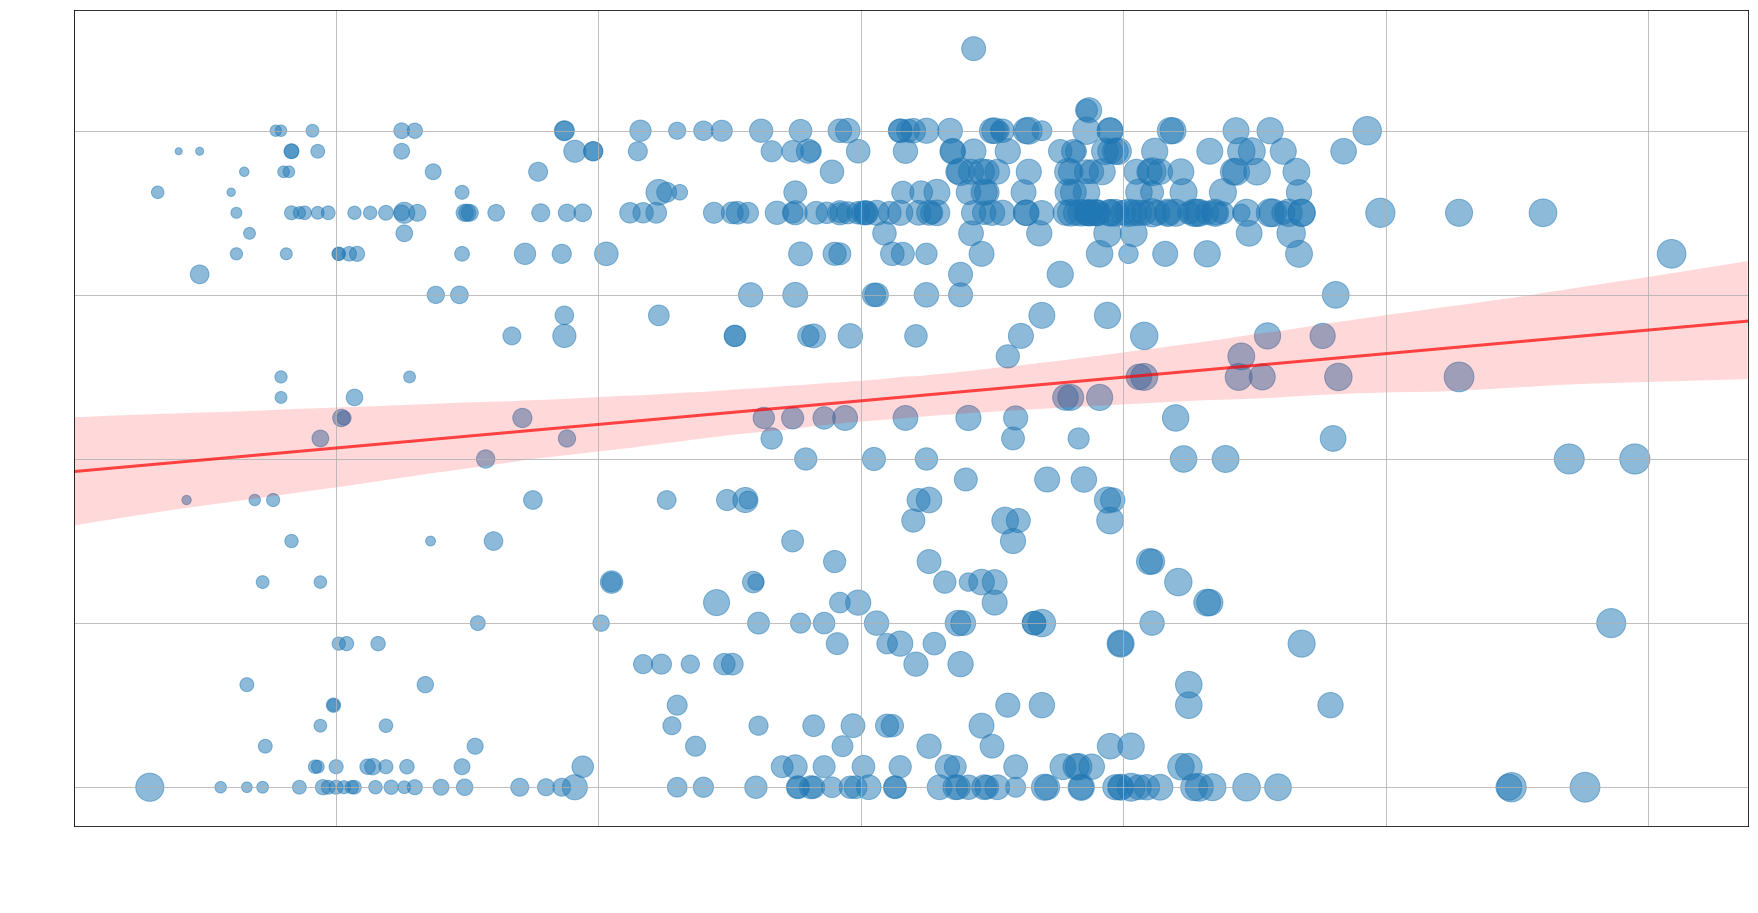

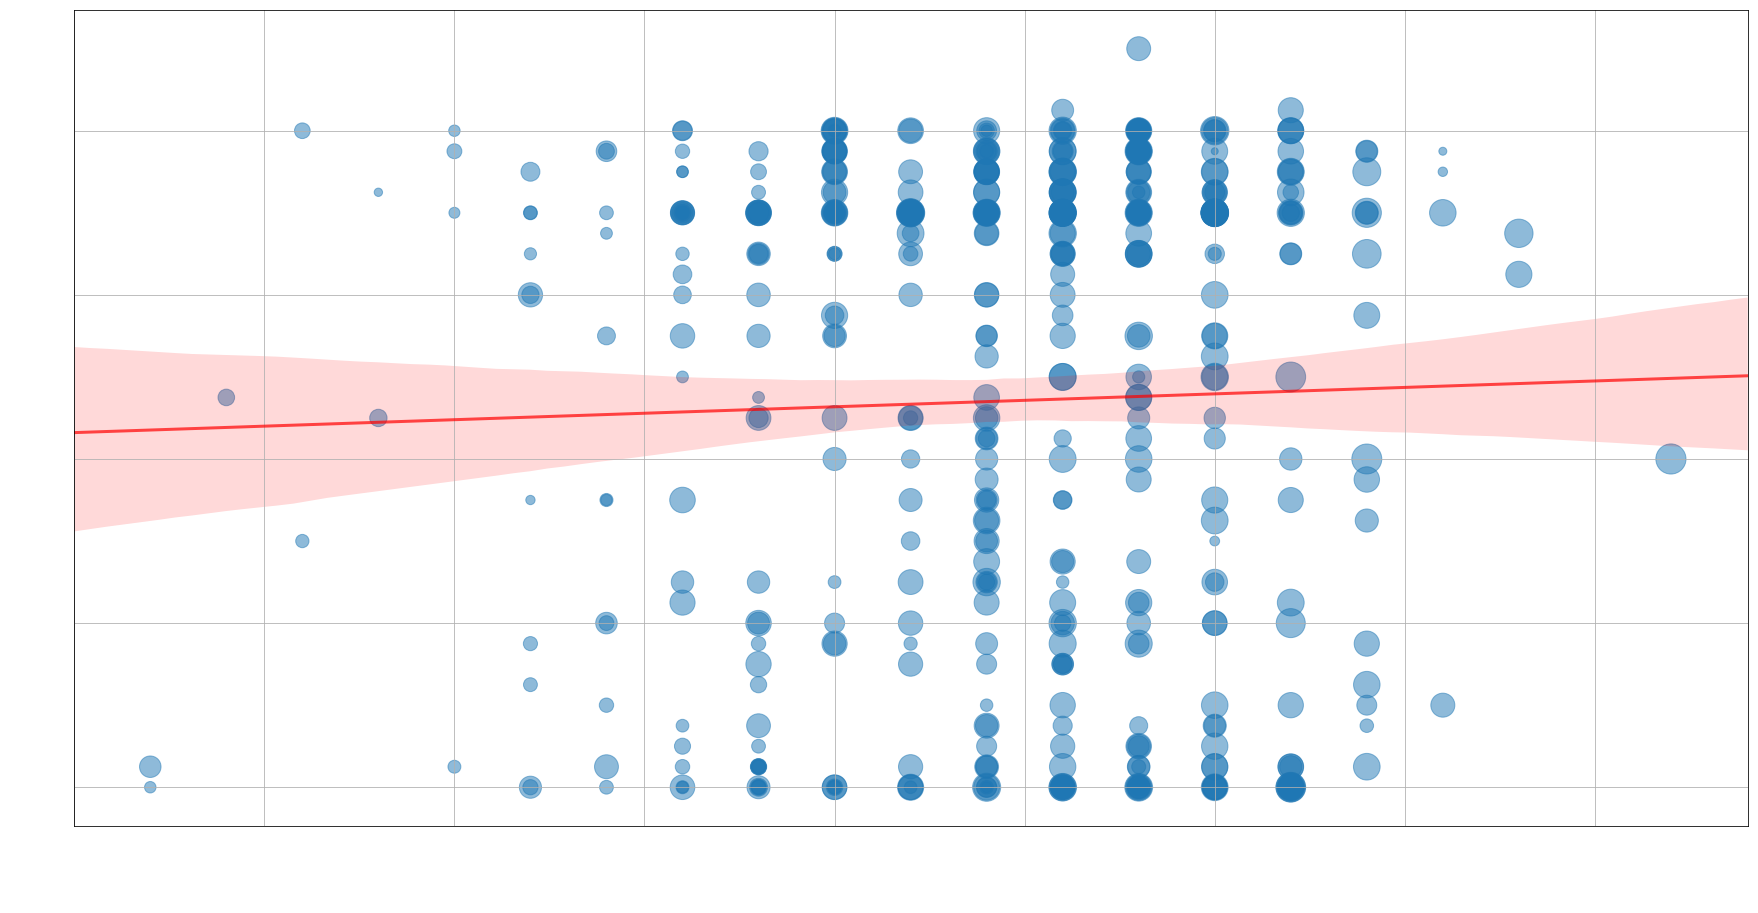

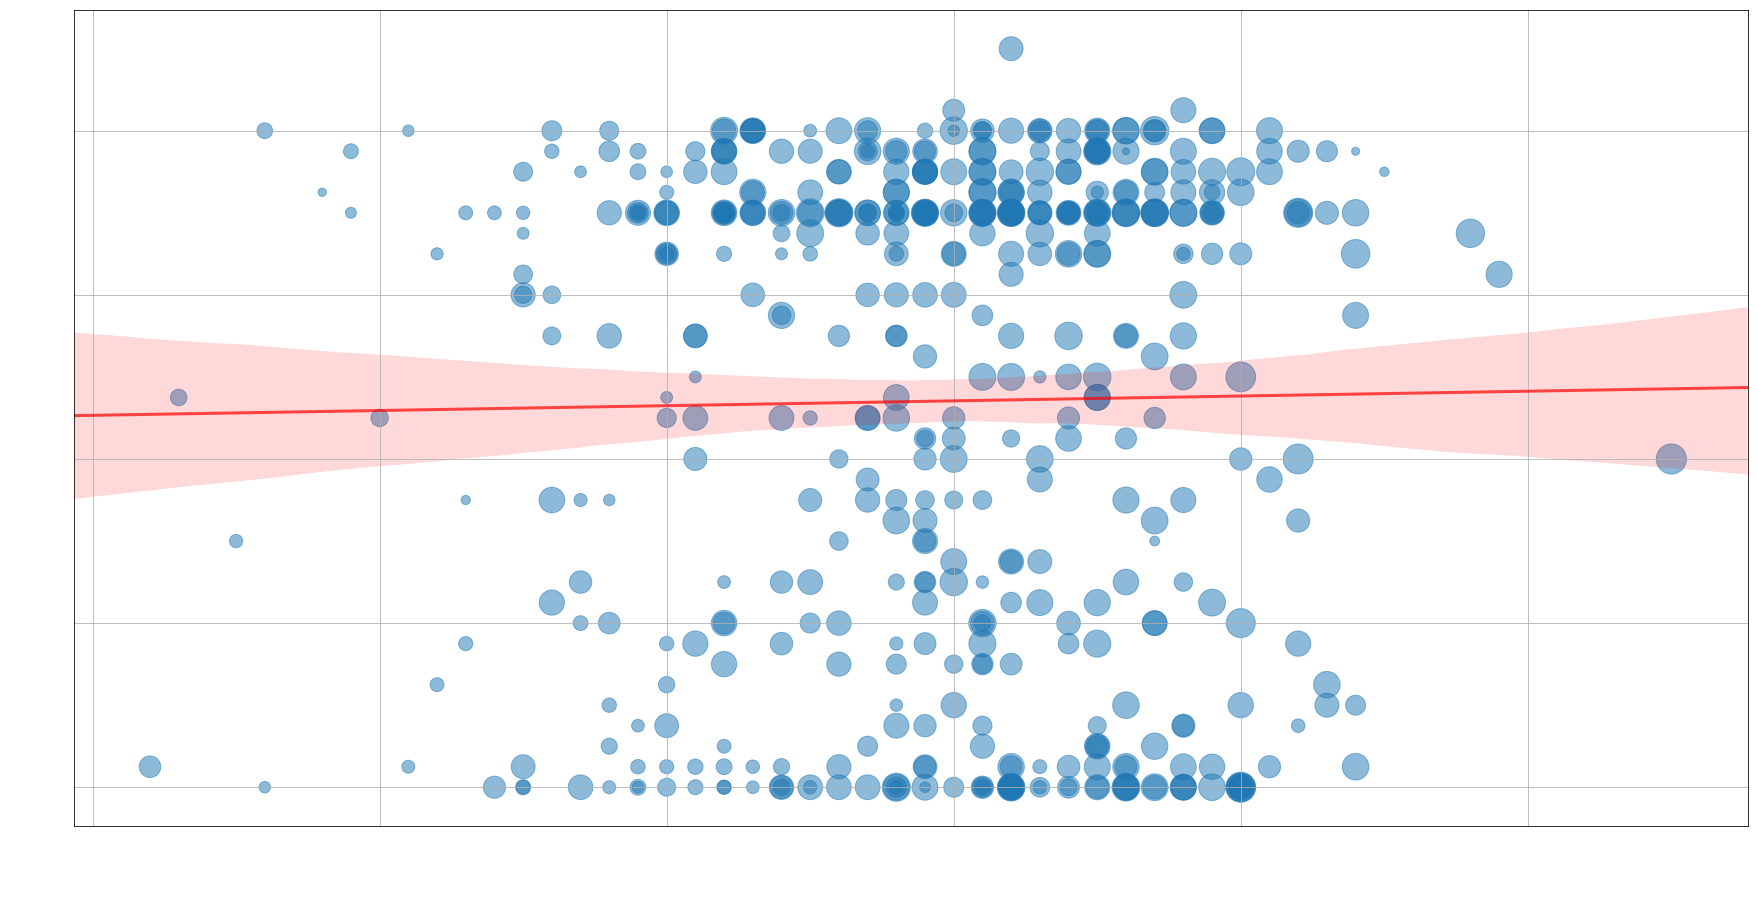

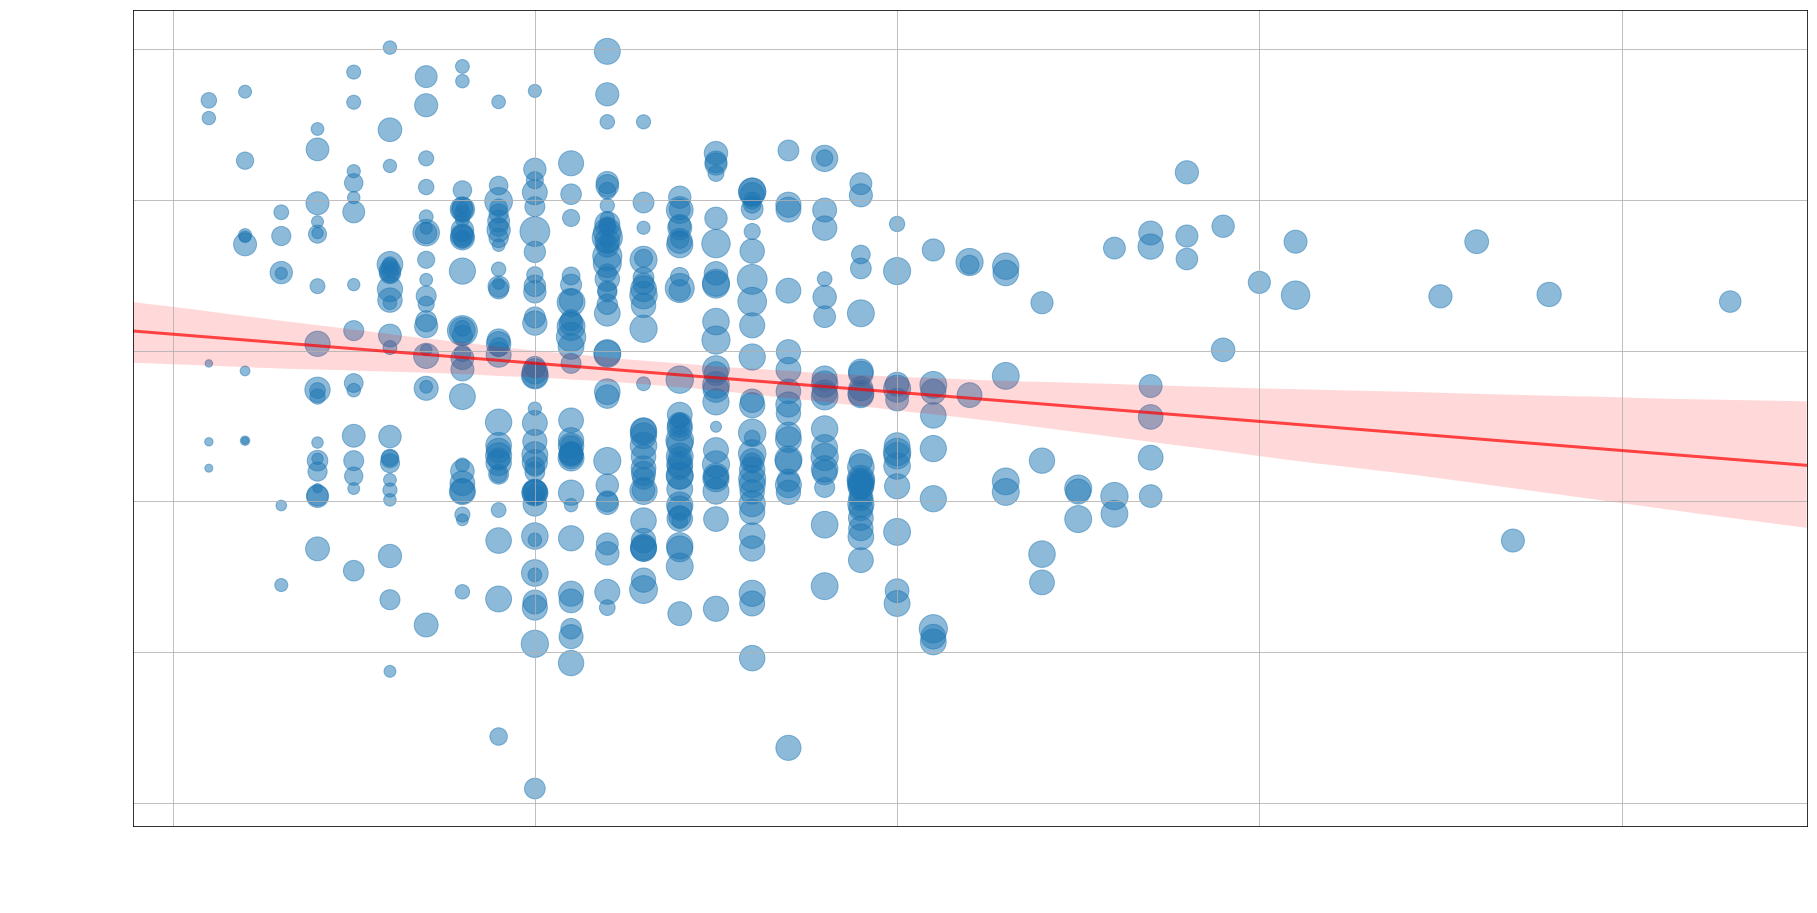

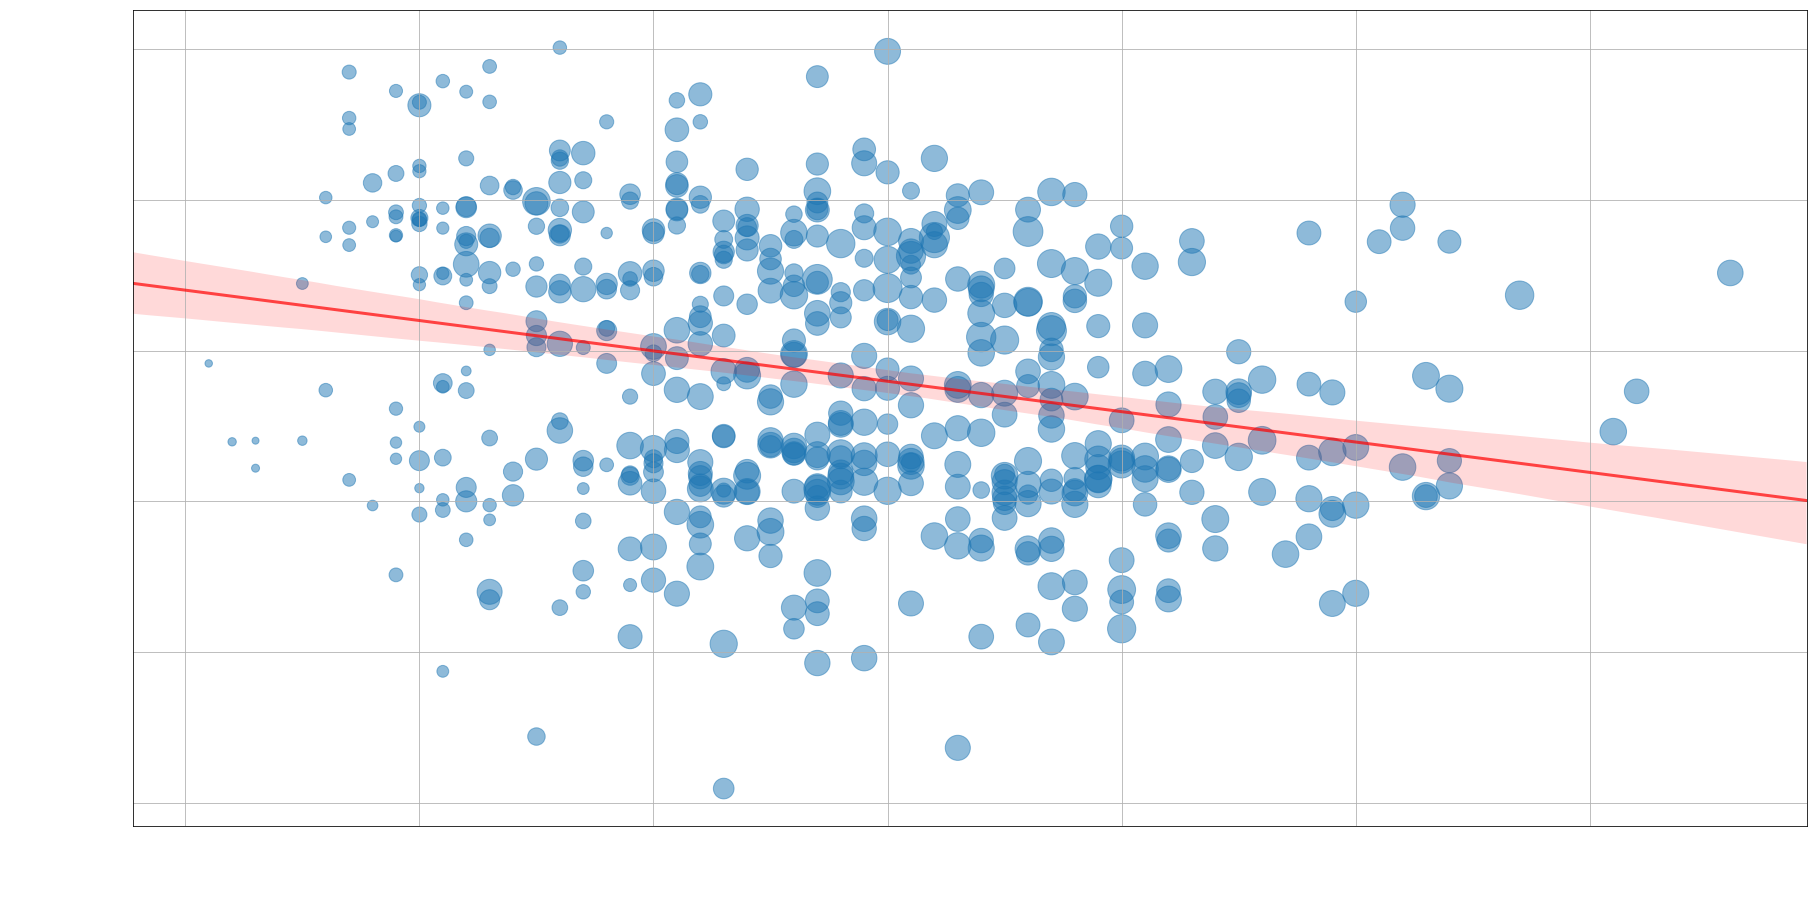

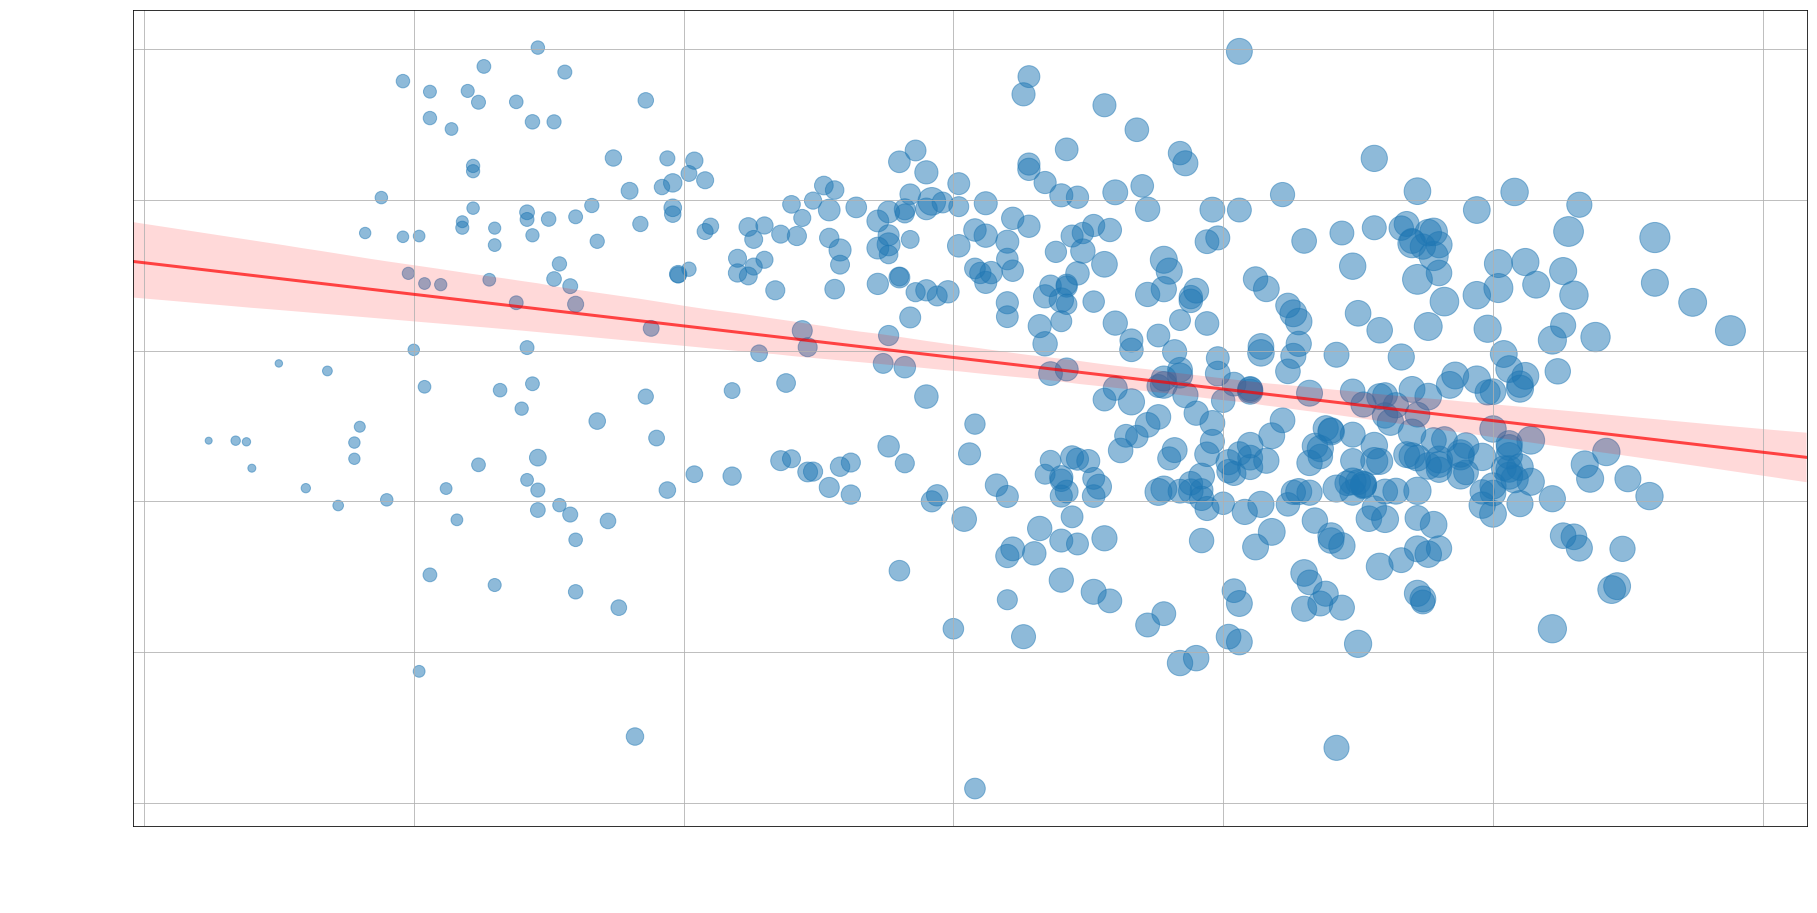

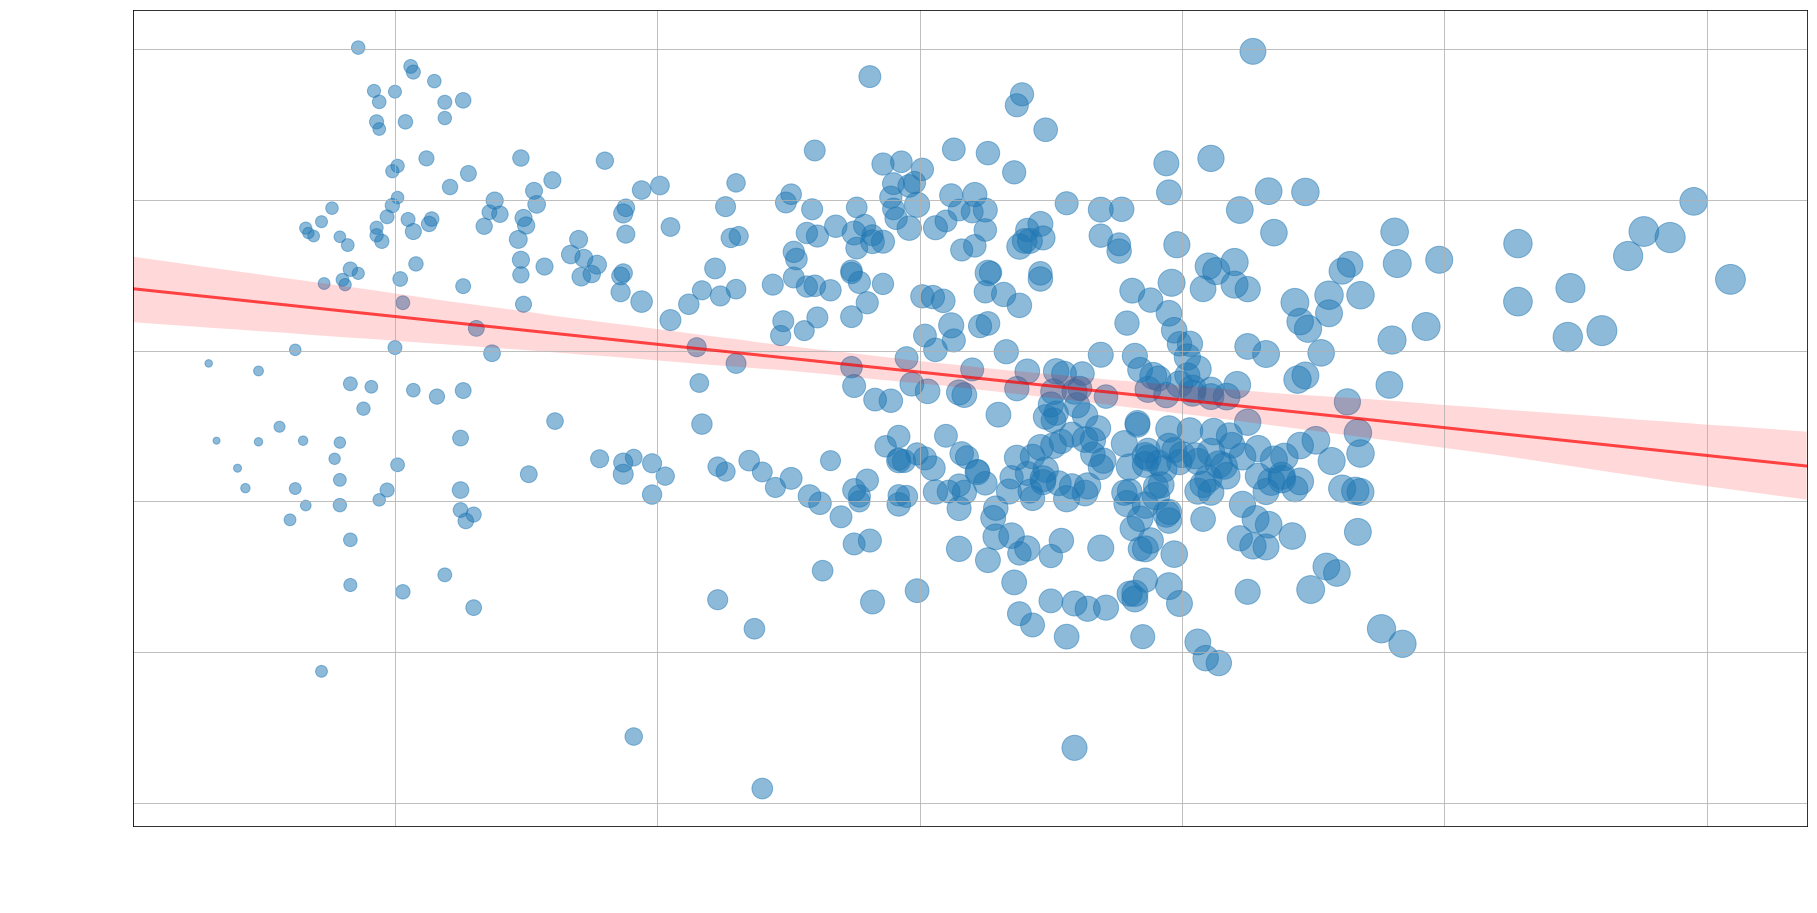

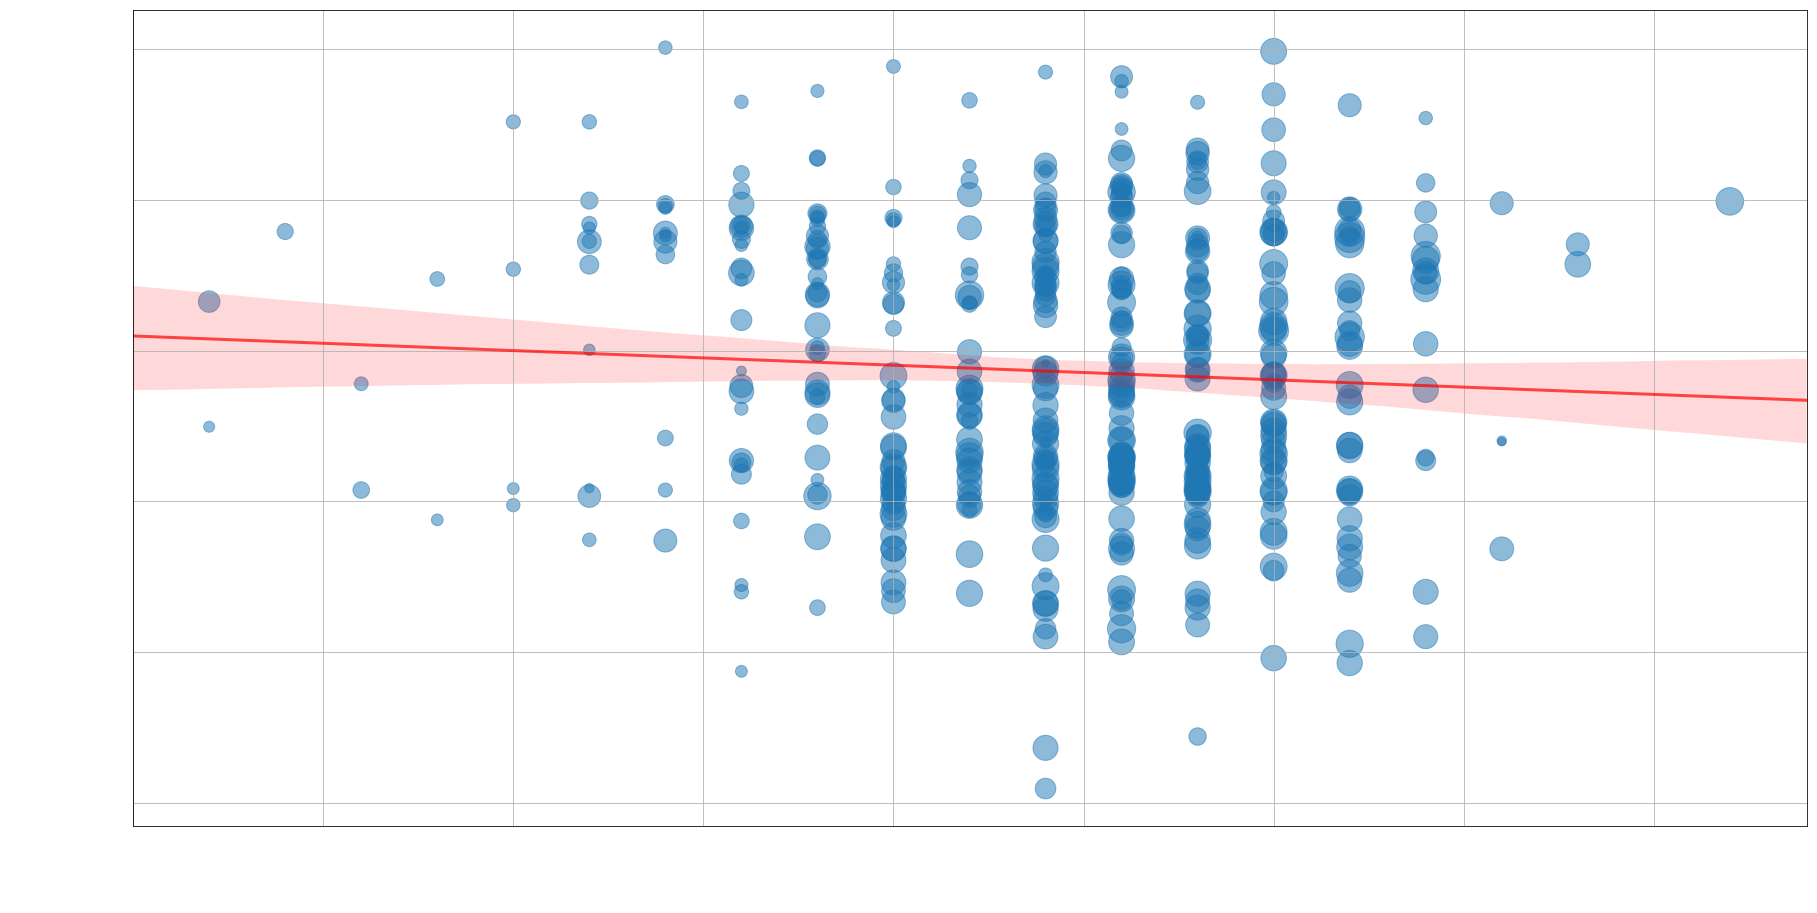

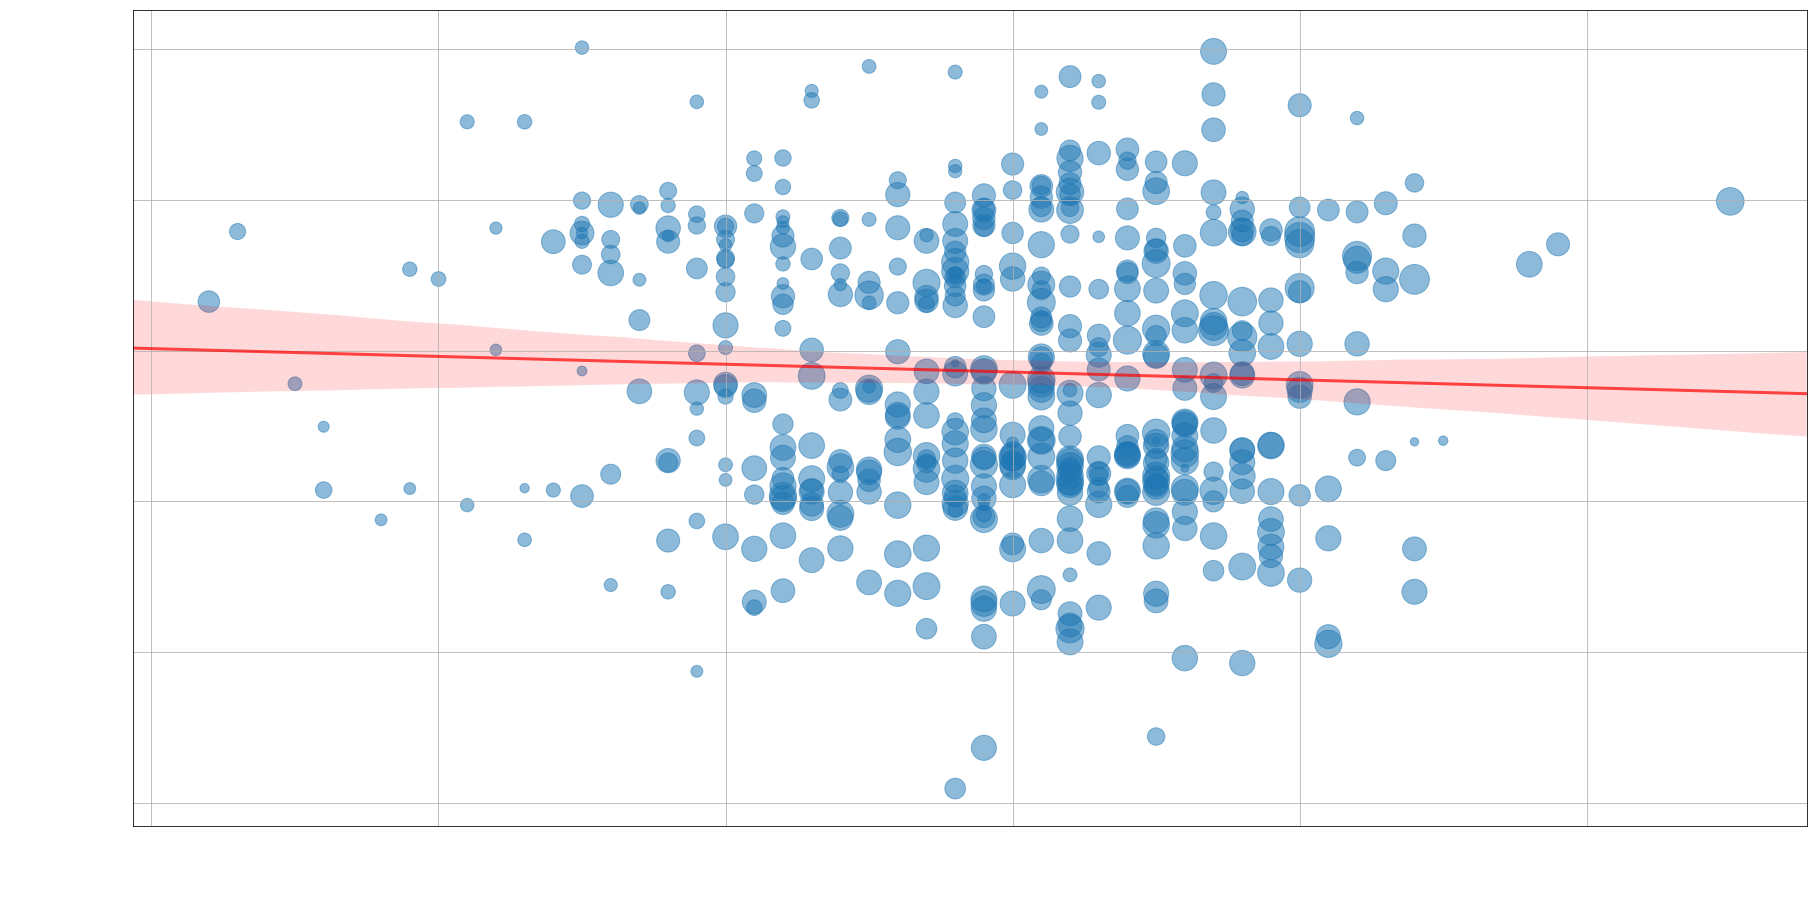

In [299]:
import seaborn as sns
x=['Extremely Negative', 'Negative',
       'Positive', 'Extremely Positive','Index', 'Net Promoter Score(tm)']

y=['precipitation_intensity', 'cloud_amount', 'air_temperature']
for i in y:
    for j in x:
        plt.figure(figsize=(30, 15))   
        ax = plt.subplot()
        plt.xticks(fontsize=40)
        plt.yticks(fontsize=40)
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')    
        plt.ylabel(i, color='white', fontsize=30)
        plt.xlabel(j, color='white', fontsize=30)
        plt.grid(True)
        sns.regplot(x=data[j], y=data[i], color=tableau20[0], scatter_kws={"alpha":0.5,'s':data['Total']}, line_kws={"color":"r","alpha":0.7,"lw":3},ax=ax)


## 2. Correlation Coefficients


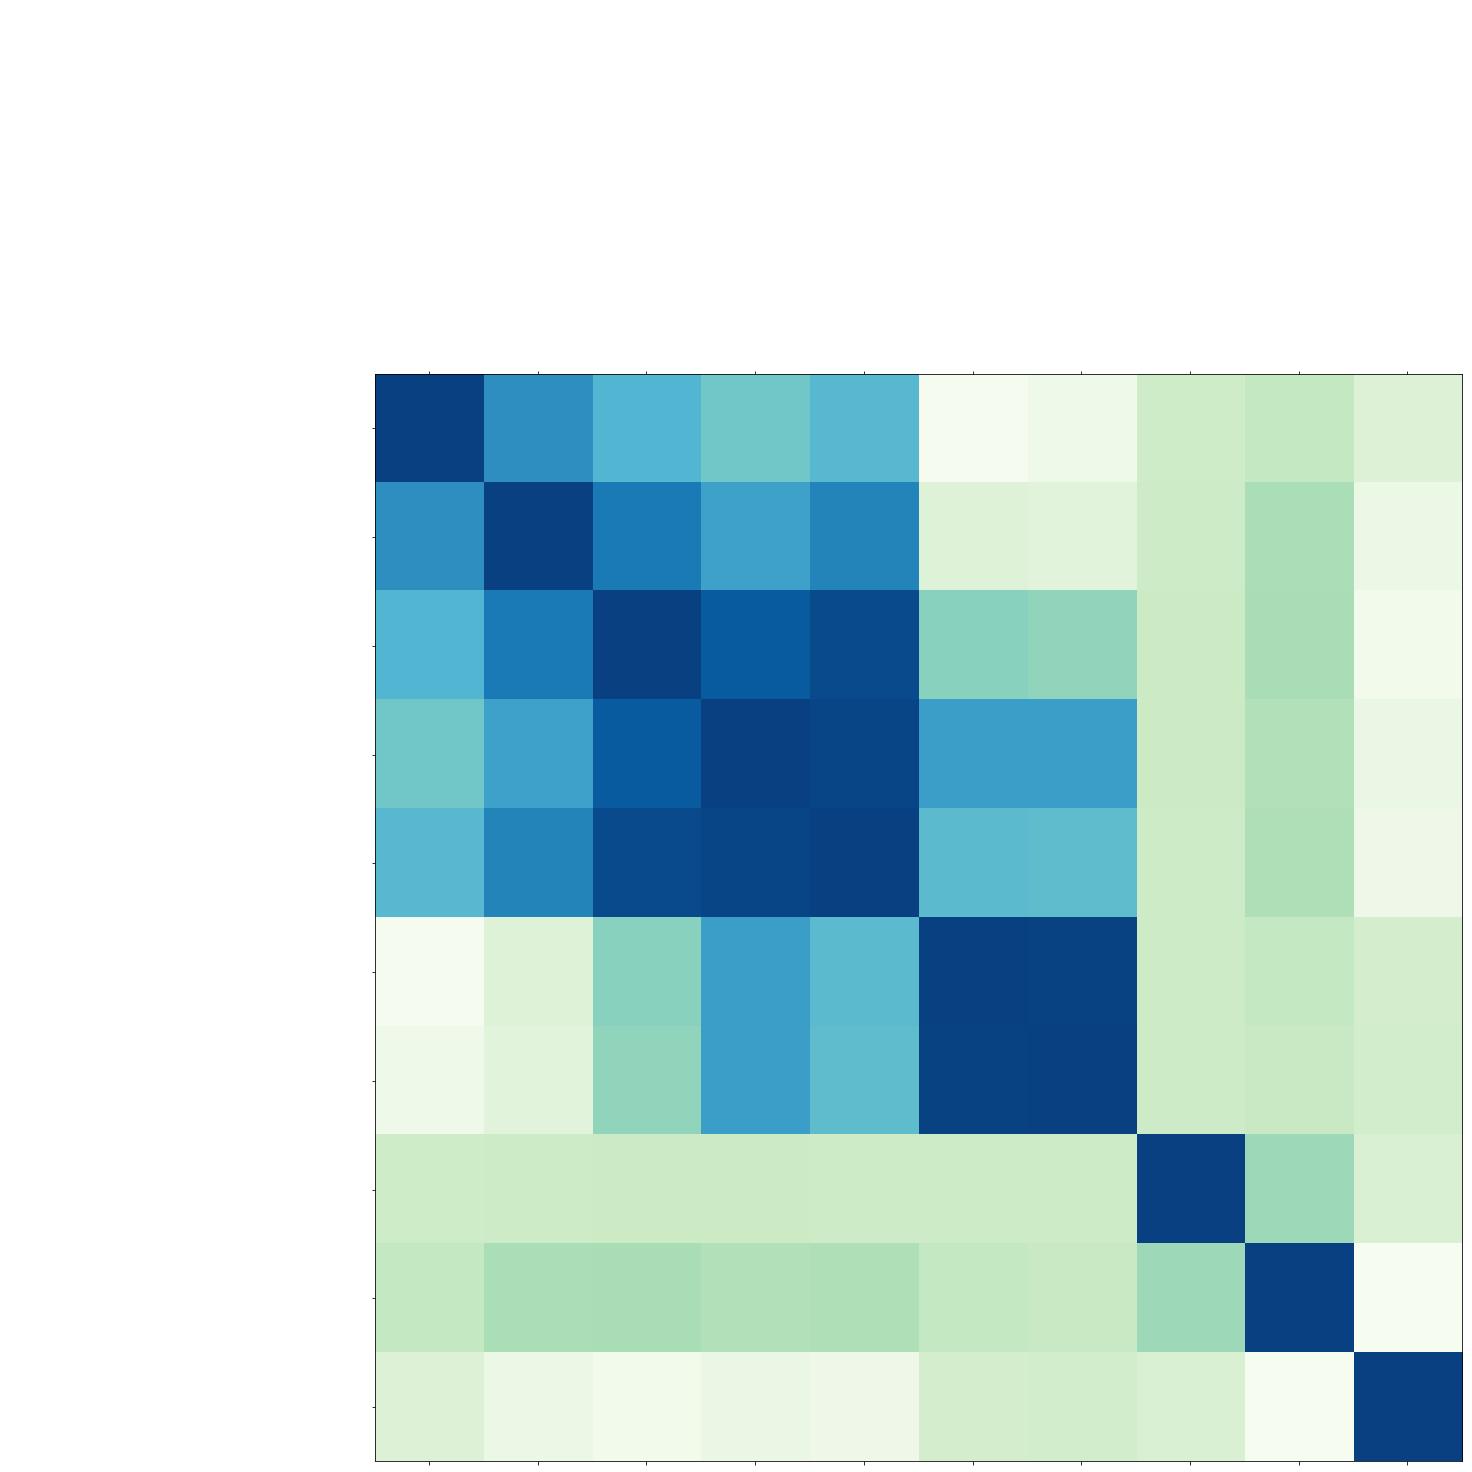

In [194]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    f =ax.matshow(corr,cmap=plt.cm.GnBu)
    plt.xticks(range(len(corr.columns)), corr.columns,fontsize=30,color='white',rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns,fontsize=30,color='white');

df2=data[['Extremely Negative', 'Negative',
       'Positive', 'Extremely Positive','Total', 'Index', 'Net Promoter Score(tm)',
        'precipitation_intensity', 'cloud_amount', 'air_temperature']]
plot_corr (df2,20)

## 3. Time-Factor Analysis
### a. Weekly

In [187]:
TEMPLATE_DICT = {"Extremely Negative":0, "Negative":0, "Positive":0, "Extremely Positive":0}
monday,tuesday,wednesday,thursday,friday= {},{},{},{},{}
monday.update(TEMPLATE_DICT)
tuesday.update(TEMPLATE_DICT)
wednesday.update(TEMPLATE_DICT)
thursday.update(TEMPLATE_DICT)
friday.update(TEMPLATE_DICT)

for i in range (len(data["date"])):
    v = monday
    if data["Day of Week"][i] == "monday":
        v = monday
    elif data["Day of Week"][i] == "tuesday":
        v = tuesday
    elif data["Day of Week"][i] == "wednesday":
        v = wednesday
    elif data["Day of Week"][i] == "thursday":
        v = thursday
    elif data["Day of Week"][i] == "friday":
        v = friday
    v["Extremely Negative"]+=data["Extremely Negative"][i]
    v["Negative"]+=data["Negative"][i]
    v["Positive"]+=data["Positive"][i]
    v["Extremely Positive"]+=data["Extremely Positive"][i]
days=[monday,tuesday,wednesday,thursday,friday]  

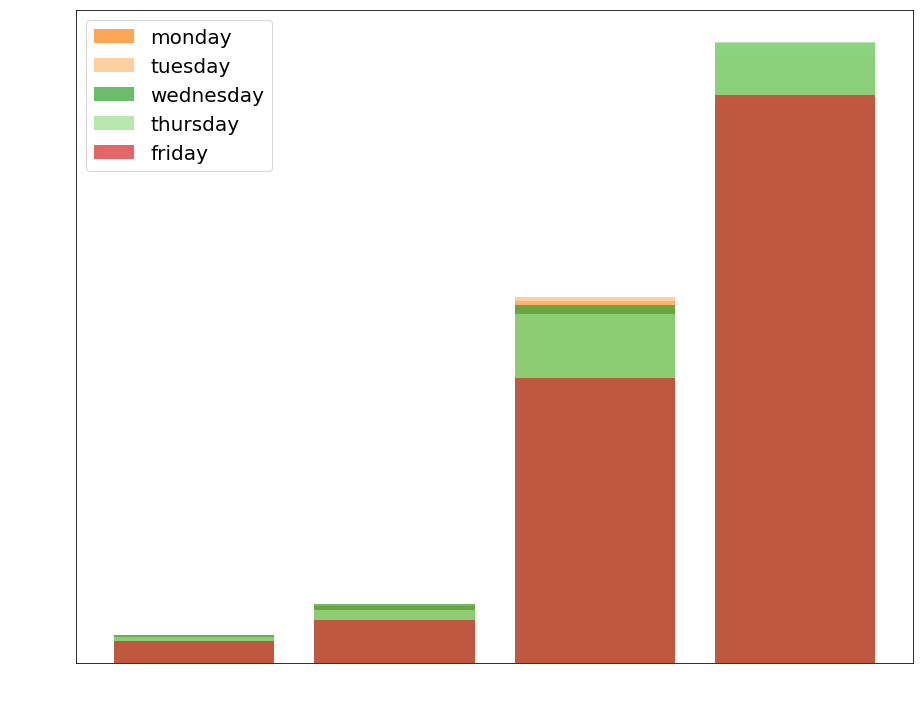

In [301]:
counter = 0
names =["monday","tuesday","wednesday","thursday","friday"] 
fig, ax = plt.subplots(figsize=(15, 12))

plt.xlabel("Reactions",fontsize=14)
plt.ylabel("Number of people",fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in days:
    plt.bar(list(i.keys()), i.values(), color=tableau20[counter+2], label = names[counter],alpha=.7)
    counter +=1

ax.legend(loc=2, prop={'size':20})
plt.show()

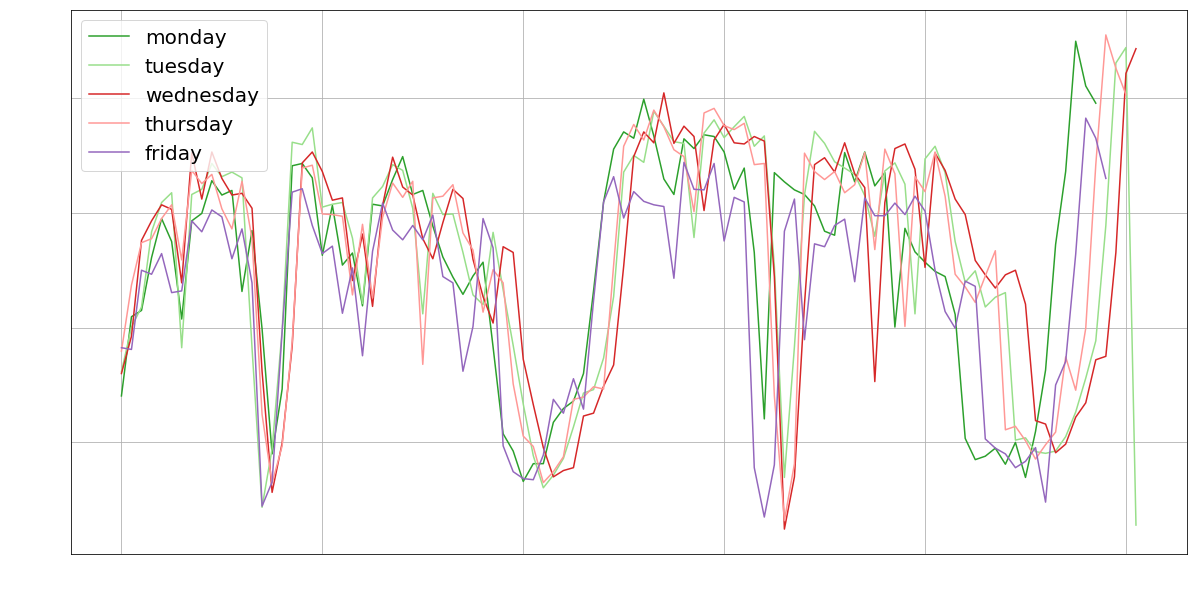

In [206]:
mon,tue,wed,thu,fri= [],[],[],[],[]
for i in range (len(data["date"])):
    if data["Day of Week"][i] == "monday":
        mon.append(data["Total"][i])
    elif data["Day of Week"][i] == "tuesday":
        tue.append(data["Total"][i])
    elif data["Day of Week"][i] == "wednesday":
        wed.append(data["Total"][i])
    elif data["Day of Week"][i] == "thursday":
        thu.append(data["Total"][i])
    elif data["Day of Week"][i] == "friday":
        fri.append(data["Total"][i])
li = [mon,tue,wed,thu,fri]
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("days",fontsize=14)
plt.ylabel("Number of people",fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


for counter, i in enumerate(li):
    plt.plot(range(len(i)),i,color=tableau20[counter+4], label = names[counter])
plt.grid(True)
ax.legend(loc='best', prop={'size':20})
plt.show()

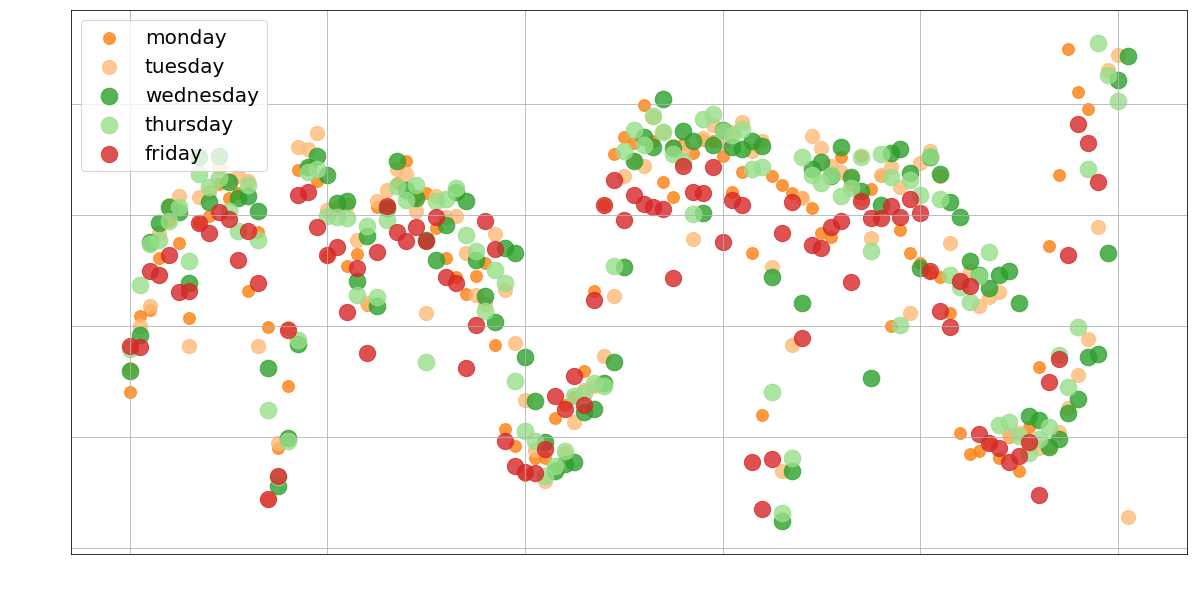

In [204]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("days",fontsize=14)
plt.ylabel("Number of people",fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for counter, i in enumerate(li):
    plt.scatter(range(len(i)),i,color=tableau20[counter+2], label = names[counter],s=i[counter]*.5, alpha=.8)
plt.grid(True)
ax.legend(loc=2, prop={'size':20})
plt.show()

#### b. Monthly

In [252]:
January.update(TEMPLATE_DICT)
February.update(TEMPLATE_DICT)
March.update(TEMPLATE_DICT)
April.update(TEMPLATE_DICT)
May.update(TEMPLATE_DICT)
June.update(TEMPLATE_DICT)
July.update(TEMPLATE_DICT)
August.update(TEMPLATE_DICT)
September.update(TEMPLATE_DICT)
October.update(TEMPLATE_DICT)
November.update(TEMPLATE_DICT)
December.update(TEMPLATE_DICT)

for i in range (len(data["date"])):
    v = monday
    if data["Month"][i] == "January":
        v = January
    elif data["Month"][i] == "February":
        v = February
    elif data["Month"][i] == "March":
        v = March
    elif data["Month"][i] == "April":
        v = April
    elif data["Month"][i] == "May":
        v = May
    elif data["Month"][i] == "June":
        v = June
    elif data["Month"][i] == "July":
        v = July
    elif data["Month"][i] == "August":
        v = August
    elif data["Month"][i] == "September":
        v = September
    elif data["Month"][i] == "October":
        v = October
    elif data["Month"][i] == "November":
        v = November
    elif data["Month"][i] == "December":
        v = December
    v["Extremely Negative"]+=data["Extremely Negative"][i]
    v["Negative"]+=data["Negative"][i]
    v["Positive"]+=data["Positive"][i]
    v["Extremely Positive"]+=data["Extremely Positive"][i]
m1=[January,February,March]
m2=[April,May,June]
m3=[July,August,September]
m4=[October,November,December]

[{'Extremely Negative': 498, 'Negative': 1168, 'Positive': 7255, 'Extremely Positive': 12246}, {'Extremely Negative': 541, 'Negative': 1088, 'Positive': 7596, 'Extremely Positive': 13548}, {'Extremely Negative': 606, 'Negative': 1237, 'Positive': 8689, 'Extremely Positive': 15149}] [{'Extremely Negative': 410, 'Negative': 1009, 'Positive': 7308, 'Extremely Positive': 13056}, {'Extremely Negative': 462, 'Negative': 991, 'Positive': 7151, 'Extremely Positive': 12696}, {'Extremely Negative': 642, 'Negative': 938, 'Positive': 5230, 'Extremely Positive': 8710}]


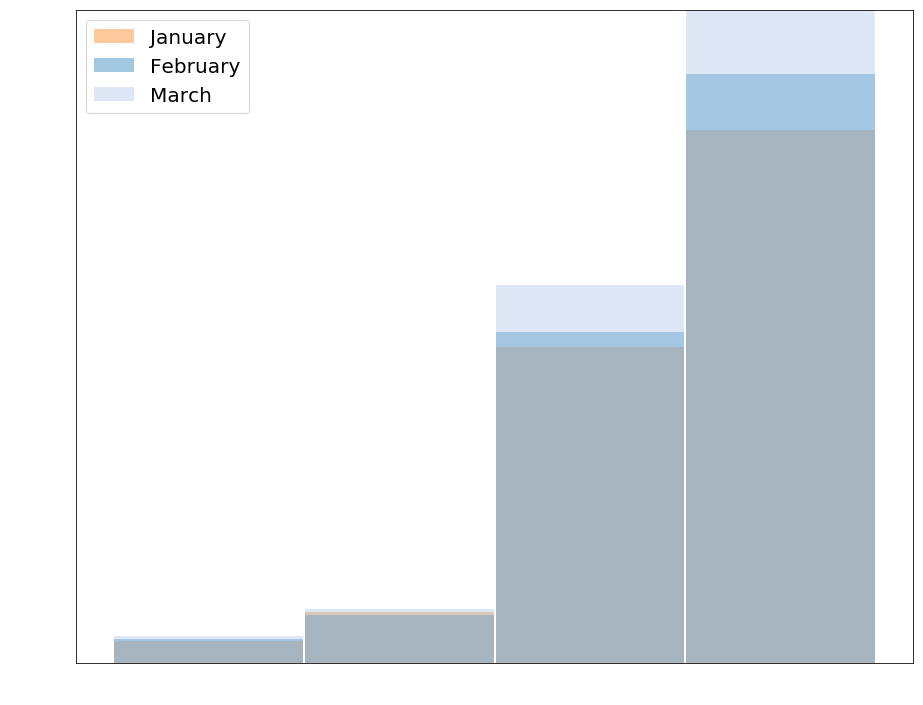

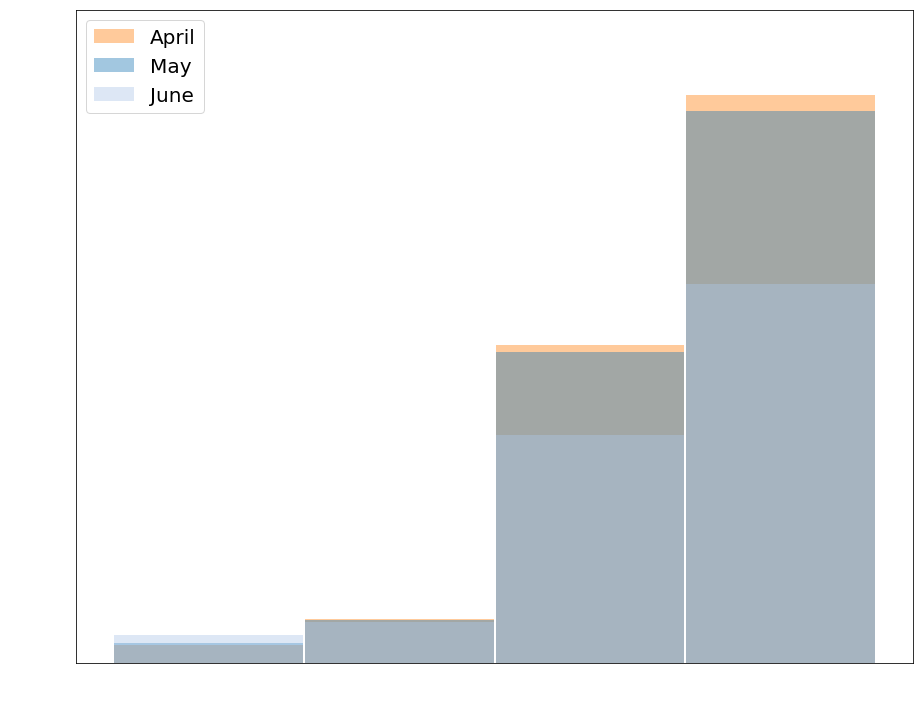

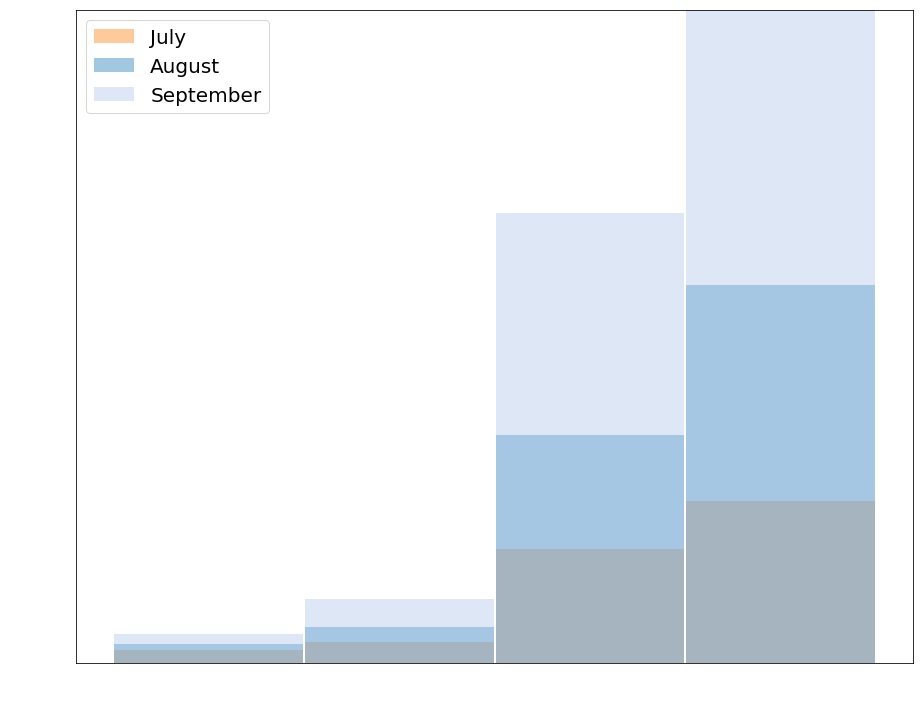

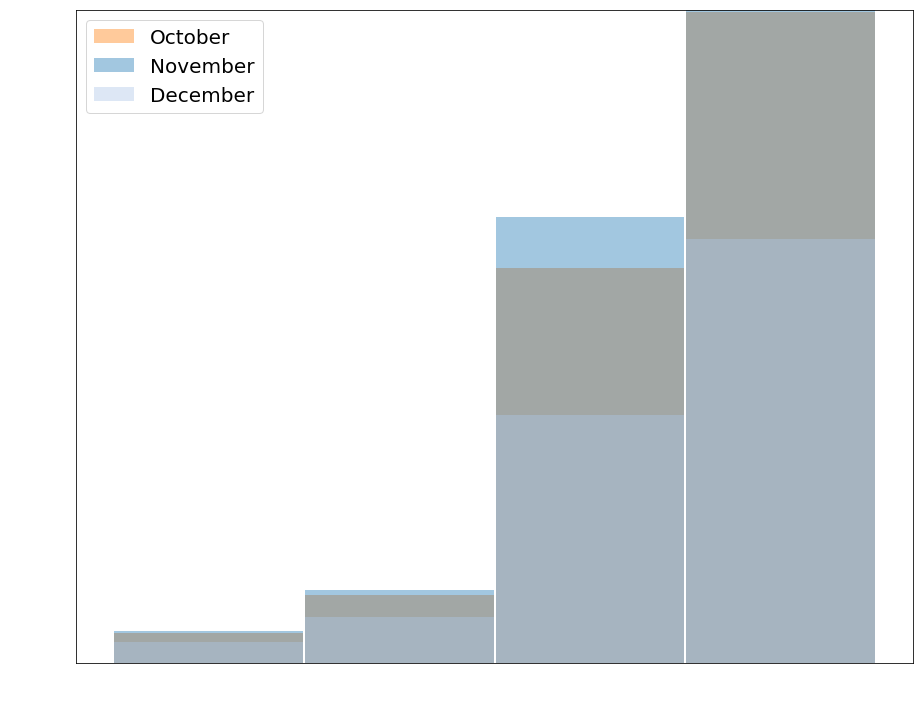

In [266]:
counter = 0
names =['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
l = [m1,m2,m3,m4]
indx=-1
c=[5,10,15]
for k in l:
    fig, ax = plt.subplots(figsize=(15, 12))
    plt.xlabel("Reactions",fontsize=14)
    plt.ylabel("Number of people",fontsize=14)    
    for counter,i in enumerate(k):
        indx+=1
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        plt.ylim(0,15000)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=14)
        plt.bar(range(len(i)), list(i.values()), align='center',color=tableau20[(indx+2)%3],label = names[indx], alpha=.41,width=.99)
        plt.xticks(range(len(i)), list(i.keys()))
    ax.legend(prop={'size':20})


### c. Yearly

In [281]:
data.head()

date  Year      Month  Week Number  Day Day of Week  \
0 2016-12-09  2016  September           37   12      monday   
1 2016-09-13  2016  September           37   13     tuesday   
2 2016-09-14  2016  September           37   14   wednesday   
3 2016-09-15  2016  September           37   15    thursday   
4 2016-09-16  2016  September           37   16      friday   

   Extremely Negative  Extremely Negative %  Negative  Negative %  ...    \
0                   9                  3.20        19        6.76  ...     
1                  14                  4.33        26        8.05  ...     
2                  11                  3.44        11        3.44  ...     
3                  22                  6.13        31        8.64  ...     
4                  12                  3.29        19        5.21  ...     

   Extremely Positive %  Total  Index  Net Promoter Score(tm)  Red %  Green %  \
0                 53.74    281     80                      44   9.96    90.04   
1                 52.63    323     79                      40  12.38    87.62   
2                 58.13    320     83                      51   6.88    93.13   
3                 49.30    359     76                      35  14.76    85.24   
4                 59.45    365     83                      51   8.49    91.51   

   precipitation_intensity  cloud_amount  air_temperature  month  
0                      0.0           7.0            1.800    NaN  
1                      0.0           0.0           17.375    NaN  
2                      0.0           0.0           14.950    NaN  
3                      0.0           7.5           15.700    NaN  
4                      0.0           1.5           14.000    NaN  

[5 rows x 23 columns]

In [284]:
TEMPLATE_DICT = {"Extremely Negative":0, "Negative":0, "Positive":0, "Extremely Positive":0}
y_1617.update(TEMPLATE_DICT)
y_1718.update(TEMPLATE_DICT)

for i in range (len(data["date"])):
    if (data["Year"][i] == 2016 or data["Year"][i] == 2017):
        v = y_1617
    elif (data["Year"][i] == 2017 or data["Year"][i] == 2018):
        v = y_1718
    v["Extremely Negative"]+=data["Extremely Negative"][i]
    v["Negative"]+=data["Negative"][i]
    v["Positive"]+=data["Positive"][i]
    v["Extremely Positive"]+=data["Extremely Positive"][i]
years=[y_1617,y_1718]


In [296]:
print (y_1617)
print(y_1718)

{'Extremely Negative': 4605, 'Negative': 9732, 'Positive': 58968, 'Extremely Positive': 96814}
{'Extremely Negative': 1850, 'Negative': 3721, 'Positive': 27523, 'Extremely Positive': 52843}


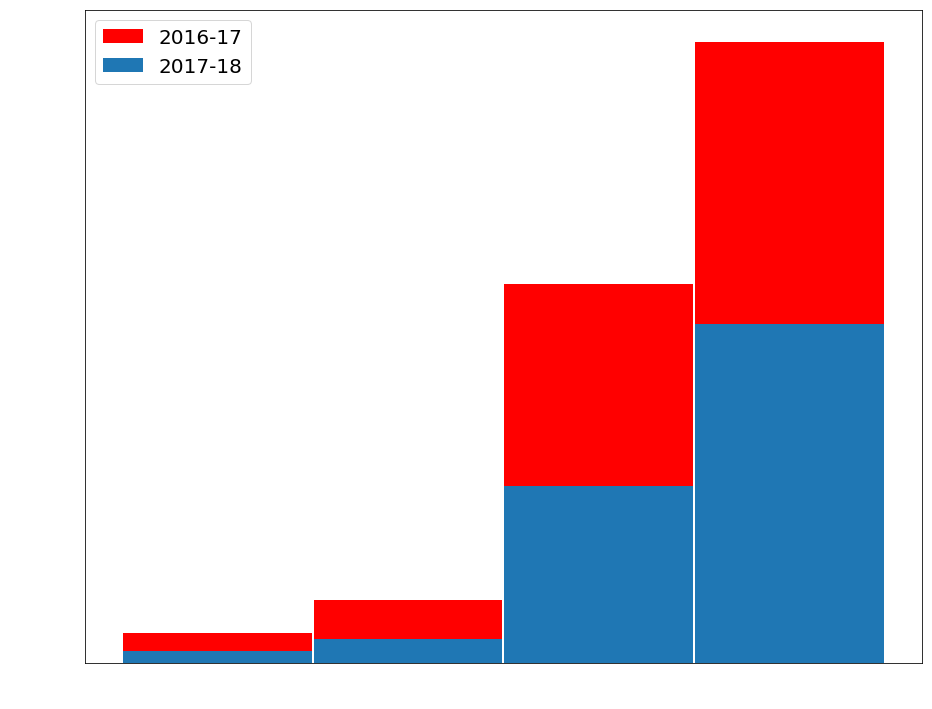

In [298]:

names =["2016-17","2017-18"] 
fig, ax = plt.subplots(figsize=(15, 12))

plt.xlabel("Reactions",fontsize=14)
plt.ylabel("Number of people",fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(range(len(y_1617)), list(y_1617.values()),color='red',label = names[0], alpha=1,width=.99)
plt.bar(range(len(y_1718)), list(y_1718.values()) ,color=tableau20[0],label = names[1], alpha=1,width=.99)
plt.xticks(range(len(y_1617)), list(y_1617.keys()))

ax.legend(loc=2, prop={'size':20})
plt.show()